<a href="https://colab.research.google.com/github/ShivaAzizzadeh2000/Bank-Target-Marketing-Dataset/blob/main/Shiva_Azizzadeh_Project_Superstore_Marketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Marketing Campaign Dataset

In [ ]:
from PIL import Image
from IPython.display import display

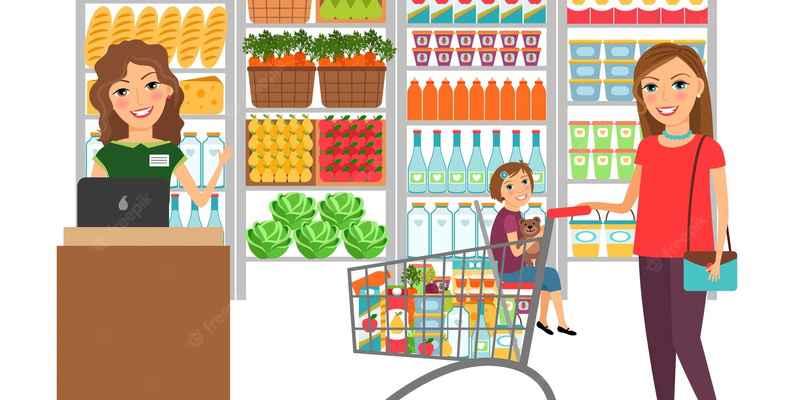

In [ ]:
img = Image.open('dataset-cover.jpg')
img

## Context
A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 Dollar which is 999 Dollar on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

## Objective
The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. You need to analyze the data provided to identify these factors and then build a prediction model to predict the probability of a customer will give a positive response.

This work has been iterative, using below framework:

- Understand the data and the problem context.
- Perform exploratory data analysis (EDA), check model assumptions, and select a model.
- Construct and evaluate the model.
- Interpret the model and share actionable steps.


This is a marketing initiative. Our prediction is whether to reach out to a customer or not, so the consequences of wrong predictions are limited.

- A false negative (i.e. not predicting a response when someone would have responded) is an opportunity cost.
- A false positive (i.e. predicting a response when someone won't respond) entails the cost of reaching out to the customer and maybe the missed opportunity of an alternative offer.



### Column Details:

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained .
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products .
- MntMeatProducts - the amount spent on meat products .
- MntFruits - the amount spent on fruits products .
- MntSweetProducts - amount spent on sweet products .
- MntWines - the amount spent on wine products .
- MntGoldProds - the amount spent on gold products .
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website .
- Recency - number of days since the last purchase



Methodology
My methodology is described through the following steps:

- Identifying the target feature and the independent variables.
- Drilling all features and their distribution.
- Exploring the relations between predictors and target.
- Verifying the stated hypotheses.
- Creating new features.
- Predict the Response- model description (F1 score, feature development, model selection)
- Model performance discussion
- Calculation of the acceptance rate

Business questions and Hypotheses
- Between Response and which features there is a statistical association at a 5% significant level?
- Which features are more important?
- What is the Accuracy, Recall, Precision, and F1 score of the existing model?
- Which machine learning algorithm has more ability to distinguish between positive and negative classes?

## Importing librarires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read in the Data set.

In [ ]:
# Import data set
# url=https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset/data
df=pd.read_csv('superstore_data.csv')

In [ ]:
# Look at Data set
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.00,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.00,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.00,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.00,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.00,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.00,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.00,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.00,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.00,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.00,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


Data set contains 2240 rows and 22 columns

# EDA, Data Cleaning, and Feature Engineering

## 1. Data Cleaning
### Objective:
- Improve the quality and accuracy of the data.

### Typical Order:
- Often the first step in the process.

### Key Activities:

- Handling missing data (e.g., imputation or removal).
- Removing duplicates.( De duplicating data)
- Correcting errors (e.g., typos, incorrect entries).
- Standardizing formats and units.
- Outlier detection and treatment.

### Importance:
- Ensures that subsequent analysis and model building are based on reliable and consistent data.

## 2. Exploratory Data Analysis (EDA)
### Objective:
- Understand the data's characteristics and uncover underlying structures, patterns, relationships, and anomalies.

### Typical Order:
- Usually follows initial data cleaning.

### Key Activities:
- univariate, Bivariate, and Multivariate Analysius
- Descriptive statistics (mean, median, mode, variance, etc.).
- Data visualization (histograms, box plots, scatter plots, etc.).
- Identifying relationships among variables.
- Preliminary assessment of data distributions and potential transformations needed.

### Additional Description:
- EDA is the process of analyzing and visualizing data to gain insights. It typically involves summarizing main characteristics, using statistical graphics and other data visualization methods. The purpose of EDA is to understand the data, discover patterns, spot anomalies, test hypotheses, and check assumptions.

### Importance:
- Guides more informed decisions in subsequent feature engineering and predictive modeling.

## 3. Feature Engineering
### Objective:
- Enhance model performance by creating new features or modifying existing ones.

### Typical Order:
- Can start after initial EDA and continue iteratively through the modeling process.

### Key Activities:
- Creating new features (e.g., combining two variables).
- Feature transformation (e.g., normalization, scaling).
- Feature selection (identifying the most relevant features).
- Encoding categorical variables.
- Dimensionality reduction (e.g., PCA).

### Importance:
- Directly impacts the effectiveness of predictive models; tailored features can significantly improve model accuracy and interpretability.

## Summary
- **Data Cleaning** is about ensuring the data is accurate and consistent.
- **EDA** is about understanding the data, its trends, patterns, and quirks.
- **Feature Engineering** is about enhancing the data to better suit the needs of predictive models.




In [ ]:
# Getting the summary of Data
pd.options.display.float_format="{:.2f}".format
df.describe().T# for numeric columns

,count,mean,std,min,25%,50%,75%,max
Id,2240.00,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Income,2216.00,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Kidhome,2240.00,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Recency,2240.00,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntWines,2240.00,303.94,336.60,0.00,23.75,173.50,504.25,1493.00
MntFruits,2240.00,26.30,39.77,0.00,1.00,8.00,33.00,199.00
MntMeatProducts,2240.00,166.95,225.72,0.00,16.00,67.00,232.00,1725.00
MntFishProducts,2240.00,37.53,54.63,0.00,3.00,12.00,50.00,259.00


In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,2240.00,NaN,NaN,NaN,5592.16,3246.66,0.00,2828.25,5458.50,8427.75,11191.00
Year_Birth,2240.00,NaN,NaN,NaN,1968.81,11.98,1893.00,1959.00,1970.00,1977.00,1996.00
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216.00,NaN,NaN,NaN,52247.25,25173.08,1730.00,35303.00,51381.50,68522.00,666666.00
Kidhome,2240.00,NaN,NaN,NaN,0.44,0.54,0.00,0.00,0.00,1.00,2.00
Teenhome,2240.00,NaN,NaN,NaN,0.51,0.54,0.00,0.00,0.00,1.00,2.00
Dt_Customer,2240,663,8/31/2012,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240.00,NaN,NaN,NaN,49.11,28.96,0.00,24.00,49.00,74.00,99.00
MntWines,2240.00,NaN,NaN,NaN,303.94,336.60,0.00,23.75,173.50,504.25,1493.00


## Handling Duplicate Data

In [ ]:
df.duplicated().sum()

0

We have no Duplicated value in our Data set

In [ ]:
# providing a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

The DataFrame contains demographic and purchasing behavior data for 2240 individuals, including variables such as age, education, income (with 24 missing values), and purchasing habits across various product categories.

## Handeling Missing Values

In [ ]:
df_null=pd.DataFrame(df.isna().sum()).rename(columns={0: 'Missing Values Count'})
df_null

,Missing Values Count
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


- We have 24 Missing values in Income variable columns
- We updated the missing Income with the mean income of the education level.

In [ ]:
income_by_Education = pd.DataFrame(df.groupby('Education')['Income'].mean())
income_by_Education

,Income
Education,
2n Cycle,47633.19
Basic,20306.26
Graduation,52720.37
Master,52917.53
PhD,56145.31


In [ ]:
df['Income'] = df['Income'].fillna(df['Education'].map(income_by_Education['Income']))

The provided code first calculates the mean income for each education level by grouping the DataFrame 'df' by the 'Education' column and taking the mean of the 'Income' column. Then, it fills missing values in the 'Income' column of DataFrame 'df' by mapping education levels to their corresponding mean incomes computed earlier. This approach replaces missing income values with the average income for each education level.

In [ ]:
#observe the different feature type present in the data
def information(df):
    df_information = pd.concat([df.dtypes, df.isna().sum(), df.nunique()], axis=1, keys=['Data types', 'Number of Missing', 'Number of Unique values'])
    return df_information

information(df)


,Data types,Number of Missing,Number of Unique values
Id,int64,0,2240
Year_Birth,int64,0,59
Education,object,0,5
Marital_Status,object,0,8
Income,float64,0,1978
Kidhome,int64,0,3
Teenhome,int64,0,3
Dt_Customer,object,0,663
Recency,int64,0,100
MntWines,int64,0,776


In [ ]:
# Looking to  the count of each unique value in the 'Marital_Status' column, providing insight into how many occurrences there
# are for each marital status category in our dataset.

df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

Yolo and Absurd has no meaning , so we consider them as Missing value and drop them

In [ ]:
df.drop(df[(df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd')].index, inplace=True)


In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: Marital_Status, dtype: int64

## Outliers

In [ ]:
# Creating outlier_detection function  to detect outliers in a DataFrame column (var) using the mean and standard deviation
# method. It also displays a boxplot to visualize the distribution of the data and prints statistical information about the column.

def outlier_detection(df,var):
    sns.boxplot(x=df[var])
    mean=df[var].mean()
    std=df[var].std()
    UB=mean+3*std
    LB=mean-3*std
    print("Mean-3 * standard Deviation:",LB ,"\nMean+3* standard Deviation:",UB)
    if((max(df[var])<UB) & ( min(df[var])> LB)):
        print("\nThere is no outlier in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)
    else:print("\nThere are some outliers in '%s' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function" % var)
    return df[var].describe()


In [ ]:
# Creating outlier_remove function to remove outliers from a DataFrame column (var) using the mean and standard deviation method.

def outlier_remove(df, var):
    mean = df[var].mean()
    std = df[var].std()
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    df_clean = df[(df[var] > lower_bound) & (df[var] < upper_bound)]

    print("DataFrame shape before removing outliers:", df.shape)
    print("DataFrame shape after removing outliers:", df_clean.shape)

    return df_clean






## Dropping Irrelevant Feature

### Dropping  id column.

In [ ]:
df.drop('Id', axis=1, inplace=True)

## Looking at Variables

### Variable Year of Birth

Age of the customer

In [ ]:
df.Year_Birth.describe()

count   2236.00
mean    1968.80
std       11.98
min     1893.00
25%     1959.00
50%     1970.00
75%     1977.00
max     1996.00
Name: Year_Birth, dtype: float64

This will output a summary of descriptive statistics for the 'Year_Birth' column, such as count, mean, standard deviation, minimum, maximum, and quartile values.

## Feature Engineering
###

In [ ]:
import datetime
df['Customer_Age'] = (datetime.datetime.now().year - df['Year_Birth'])

df['Customer_Age'].describe()

count   2236.00
mean      55.20
std       11.98
min       28.00
25%       47.00
50%       54.00
75%       65.00
max      131.00
Name: Customer_Age, dtype: float64

This code calculates the age of customers based on their birth year and adjusts the age if their birthday hasn't occurred yet this year. Then, it provides descriptive statistics for the 'Customer_Age' column.

The descriptive statistics for the 'Customer_Age' column that you provided indicate the following:

- Count: There are 2236 non-null values in the 'Customer_Age' column.
- Mean: The average age of customers is approximately 55.20 years.
- Standard deviation (std): The standard deviation of customer ages is approximately 11.98 years. This measures the dispersion    of ages around the mean.
- Minimum (min): The youngest customer is 28 years old.
- 25th percentile (25%): 25% of customers are aged 47 years or younger.
- Median (50%): The median age of customers is 54 years. This is the middle value of the sorted ages.
- 75th percentile (75%): 75% of customers are aged 65 years or younger.
- Maximum (max): The oldest customer is 131 years old.

In [ ]:
df.drop('Year_Birth' , axis=1 , inplace=True)

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2837204698.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Customer_Age , fit=norm)


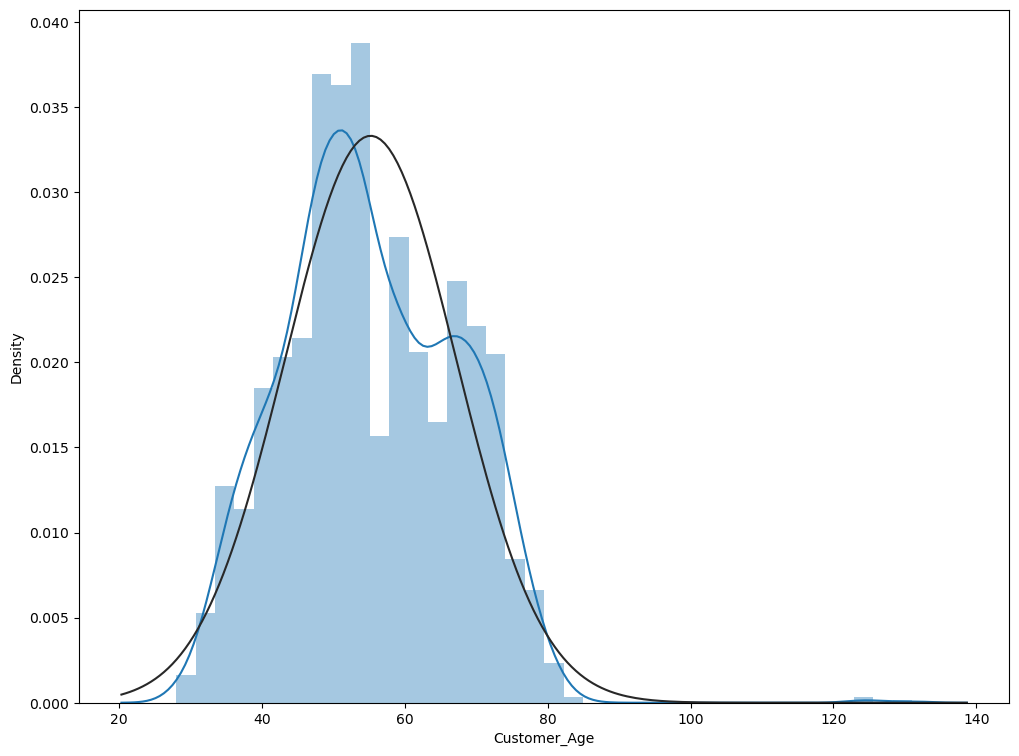

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(df.Customer_Age , fit=norm)
plt.show()

Mean-3 * standard Deviation: 19.261677861472755 
Mean+3* standard Deviation: 91.14529888271329

There are some outliers in 'Customer_Age' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2236.00
mean      55.20
std       11.98
min       28.00
25%       47.00
50%       54.00
75%       65.00
max      131.00
Name: Customer_Age, dtype: float64

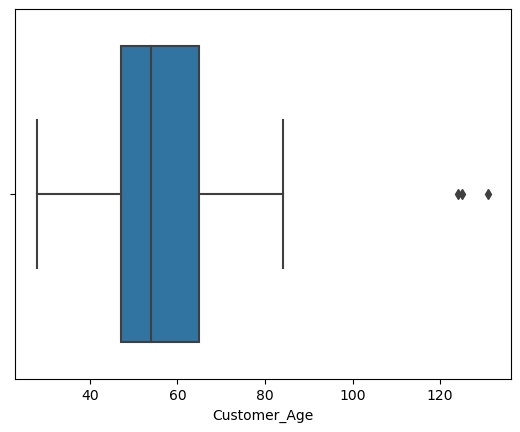

In [ ]:
outlier_detection(df,'Customer_Age')

It seems that the result indicating that there are outliers in the 'Customer_Age' column based on the mean and standard deviation method. The statistics  provided indicate that the maximum age is 131, which is considerably higher than the mean age of 55.20. This large difference suggests that there might be outliers in the data.

In [ ]:
cleaned_df = outlier_remove(df, 'Customer_Age')
cleaned_df

DataFrame shape before removing outliers: (2236, 21)
DataFrame shape after removing outliers: (2233, 21)


,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age
0,Graduation,Divorced,84835.00,0,0,6/16/2014,0,189,104,379,...,189,218,1,4,4,6,1,1,0,54
1,Graduation,Single,57091.00,0,0,6/15/2014,0,464,5,64,...,0,37,1,7,3,7,5,1,0,63
2,Graduation,Married,67267.00,0,1,5/13/2014,0,134,11,59,...,2,30,1,3,2,5,2,0,0,66
3,Graduation,Together,32474.00,1,1,11/5/2014,0,10,0,1,...,0,0,1,1,0,2,7,0,0,57
4,Graduation,Single,21474.00,1,0,8/4/2014,0,6,16,24,...,0,34,2,3,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.00,0,1,7/3/2013,99,372,18,126,...,48,78,2,5,2,11,4,0,0,48
2236,2n Cycle,Married,31056.00,1,0,1/22/2013,99,5,10,13,...,8,16,1,1,0,3,8,0,0,47
2237,Graduation,Divorced,46310.00,1,0,3/12/2012,99,185,2,88,...,5,14,2,6,1,5,8,0,0,48
2238,Graduation,Married,65819.00,0,0,11/29/2012,99,267,38,701,...,165,63,1,5,4,10,3,0,0,46


DataFrame had a shape of (2236, 21) before removing outliers and a shape of (2233, 21) after removing outliers. This means that three rows were removed as outliers.

In [ ]:
df=cleaned_df

### Education

In [ ]:
df['Education'].value_counts()

Graduation    1126
PhD            483
Master         369
2n Cycle       201
Basic           54
Name: Education, dtype: int64

This information provides insight into the distribution of education levels among the individuals in your dataset.

<Axes: ylabel='Education'>

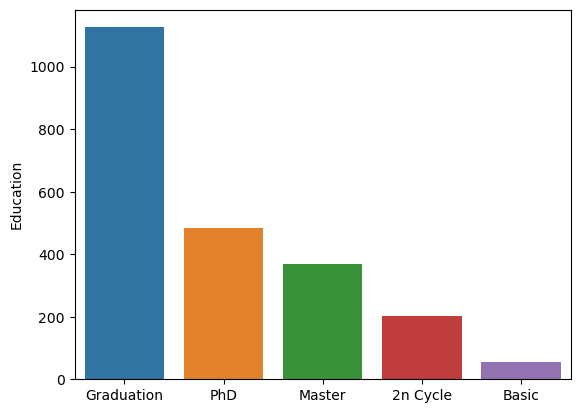

In [ ]:
sns.barplot(x=df['Education'].value_counts().index, y=df['Education'].value_counts())


<Axes: xlabel='Education', ylabel='count'>

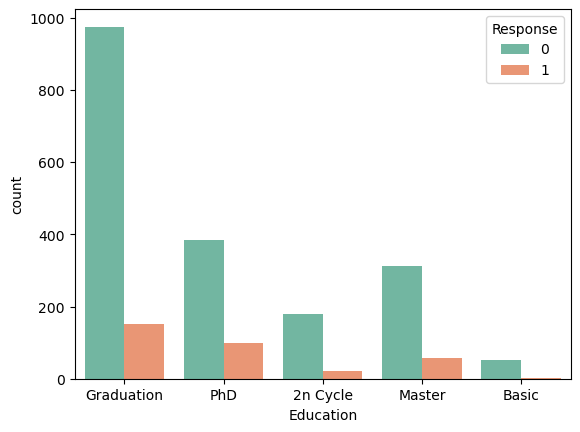

In [ ]:

sns.countplot(data=df, x='Education', hue='Response', palette='Set2')




## Encoding

By performing these steps, we have converted the categorical 'Education' column into a numerical representation ('Education_Encoded') that can be used in machine learning algorithms or other analytical tasks where numerical inputs are required.

Overall, this code segment transforms categorical data into a numerical format, making it more suitable for various data analysis and machine learning tasks.

In [ ]:
education_dict={'Basic' : 1,
                '2n Cycle' : 2,
                'Graduation' : 3,
                'Master' : 4,
                'PhD' : 5
               }
df['Education_Encoded']=df.Education.map(education_dict)
df.drop('Education' , axis=1 , inplace=True)
df

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2711321423.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education_Encoded']=df.Education.map(education_dict)
C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2711321423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Education' , axis=1 , inplace=True)


,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Education_Encoded
0,Divorced,84835.00,0,0,6/16/2014,0,189,104,379,111,...,218,1,4,4,6,1,1,0,54,3
1,Single,57091.00,0,0,6/15/2014,0,464,5,64,7,...,37,1,7,3,7,5,1,0,63,3
2,Married,67267.00,0,1,5/13/2014,0,134,11,59,15,...,30,1,3,2,5,2,0,0,66,3
3,Together,32474.00,1,1,11/5/2014,0,10,0,1,0,...,0,1,1,0,2,7,0,0,57,3
4,Single,21474.00,1,0,8/4/2014,0,6,16,24,11,...,34,2,3,1,2,7,1,0,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Divorced,66476.00,0,1,7/3/2013,99,372,18,126,47,...,78,2,5,2,11,4,0,0,48,5
2236,Married,31056.00,1,0,1/22/2013,99,5,10,13,3,...,16,1,1,0,3,8,0,0,47,2
2237,Divorced,46310.00,1,0,3/12/2012,99,185,2,88,15,...,14,2,6,1,5,8,0,0,48,3
2238,Married,65819.00,0,0,11/29/2012,99,267,38,701,149,...,63,1,5,4,10,3,0,0,46,3


### Distribution of Education

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3793303555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Education_Encoded, fit= norm)


<Axes: xlabel='Education_Encoded', ylabel='Density'>

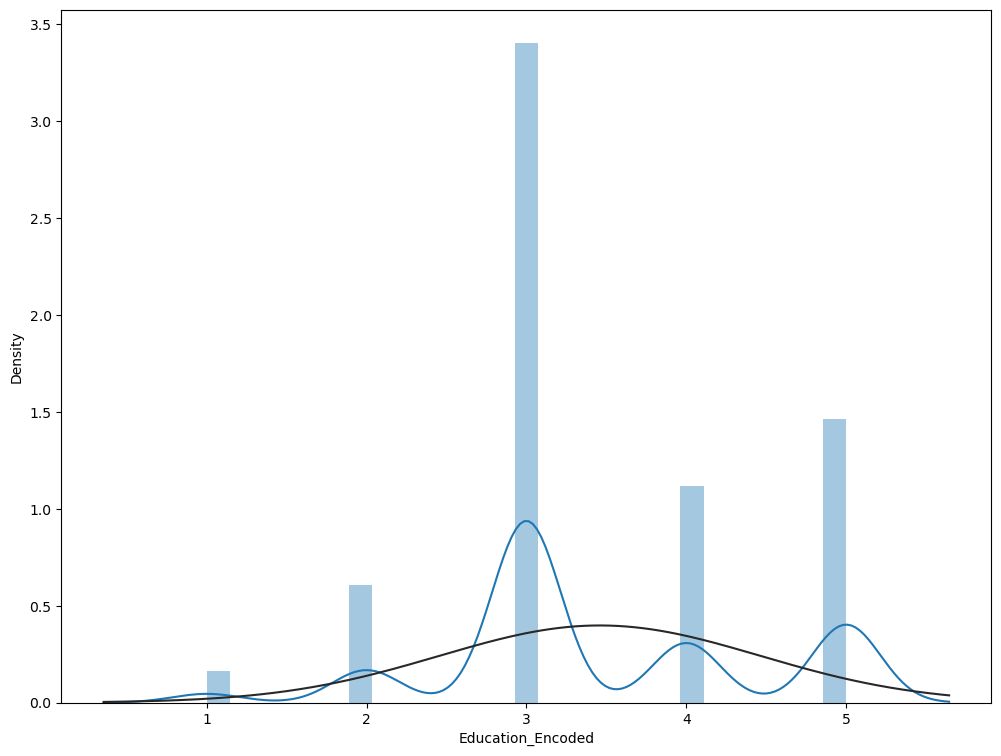

In [ ]:
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(df.Education_Encoded, fit= norm)


## Marital Status

This data provides insight into the distribution of marital statuses among the individuals in your dataset. It's useful for understanding the demographic composition of  population or for further analysis, such as investigating relationships between marital status and other variables.

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Name: Marital_Status, dtype: int64

## Feature Engineering

After applying the replacements to the 'Marital_Status' column as specified in  code, the data now represents a simplified categorization of marital statuses. Here's the interpretation:

    Married: Individuals previously categorized as 'Together' are now considered 'Married'.
    Single: Individuals previously categorized as 'Divorced', 'Widow', or 'Alone' are now grouped under 'Single'.

So, the 'Marital_Status' column now contains two categories: 'Married' and 'Single'. This simplification may be useful for certain analyses where distinguishing between these two broader categories is sufficient.

In [ ]:
df['Marital_Status']=df['Marital_Status'].replace({'Together':'Married',
                                                  'Divorced' : 'Single' ,
                                                  'Widow' : 'Single' ,
                                                  'Alone' : 'Single'
                                                 })


C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2923734994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status']=df['Marital_Status'].replace({'Together':'Married',


In [ ]:
df['Marital_Status'].value_counts()

Married    1443
Single      790
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

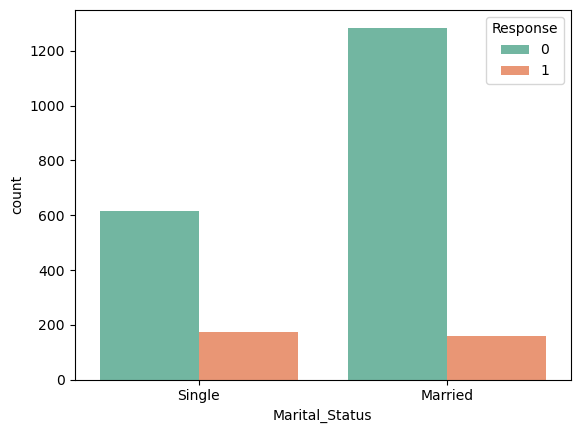

In [ ]:
sns.countplot(data=df, x='Marital_Status', hue='Response', palette='Set2')

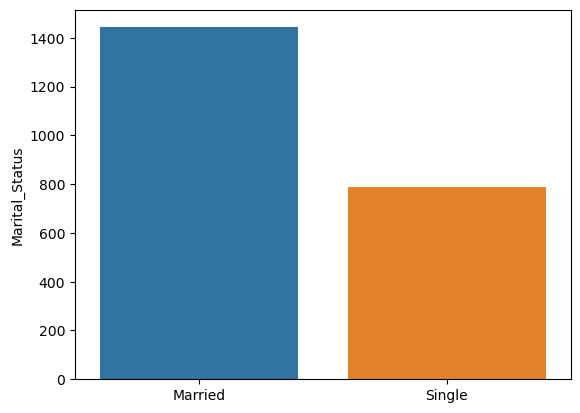

In [ ]:
sns.barplot(x=df['Marital_Status'].value_counts().index , y=df['Marital_Status'].value_counts())

plt.xlabel=('Marital_Status')
plt.ylabel=('Count')
plt.title = 'Distribution of Marital_Status'
plt.show()

Number of Married customers are more than customers who leaves alone

## Encoding

This code replaces the values in the 'Marital_Status' column with numerical equivalents using the provided mapping dictionary.

    'Single' is replaced with 0.
    'Married' is replaced with 1.

This transformation converts the 'Marital_Status' column from a categorical variable to a numerical one, which can be beneficial for certain analyses and machine learning models.


In [ ]:
df.Marital_Status = df.Marital_Status.map(
                    {
                        'Single': 0,
                        'Married': 1
                    }
                    )

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2714230100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Marital_Status = df.Marital_Status.map(


In [ ]:
df.head()

,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Education_Encoded
0,0,84835.00,0,0,6/16/2014,0,189,104,379,111,...,218,1,4,4,6,1,1,0,54,3
1,0,57091.00,0,0,6/15/2014,0,464,5,64,7,...,37,1,7,3,7,5,1,0,63,3
2,1,67267.00,0,1,5/13/2014,0,134,11,59,15,...,30,1,3,2,5,2,0,0,66,3
3,1,32474.00,1,1,11/5/2014,0,10,0,1,0,...,0,1,1,0,2,7,0,0,57,3
4,0,21474.00,1,0,8/4/2014,0,6,16,24,11,...,34,2,3,1,2,7,1,0,35,3


## Income

In [ ]:
df['Income'].describe()

count     2233.00
mean     52228.44
std      25058.49
min       1730.00
25%      35441.00
50%      51569.00
75%      68281.00
max     666666.00
Name: Income, dtype: float64

The statistics provided for the 'Income' column are as follows:

- Count: There are 2236 non-null values in the 'Income' column.
- Mean: The average income is approximately $52,239.02.
- Standard Deviation (std): The standard deviation of income is approximately $25,053.15. This measures the dispersion of incomes around the mean.
- Minimum (min): The minimum income is $1,730.00.
- 25th percentile (25%): 25% of incomes are $35,502.50 or lower.
- Median (50%): The median income is $51,609.50. This is the middle value of the sorted incomes.
- 75th percentile (75%): 75% of incomes are $68,289.75 or lower.
- Maximum (max): The maximum income is $666,666.00.

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\743578500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Income)


<Axes: xlabel='Income', ylabel='Density'>

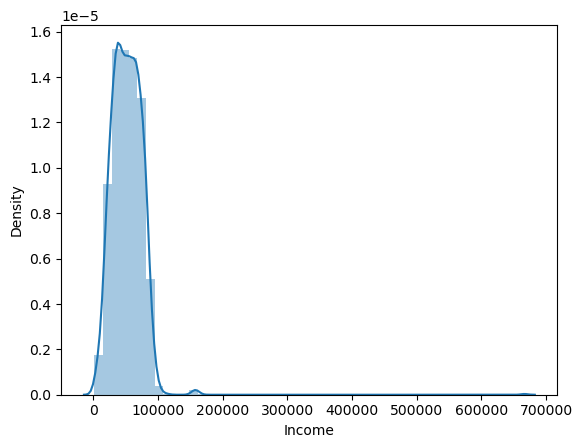

In [ ]:
sns.distplot(df.Income)

Mean-3 * standard Deviation: -22947.026434652646 
Mean+3* standard Deviation: 127403.89873299075

There are some outliers in 'Income' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count     2233.00
mean     52228.44
std      25058.49
min       1730.00
25%      35441.00
50%      51569.00
75%      68281.00
max     666666.00
Name: Income, dtype: float64

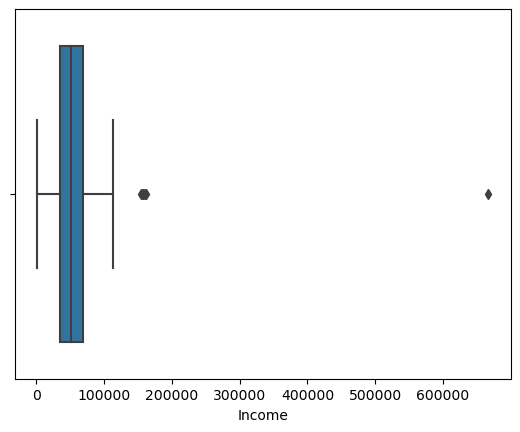

In [ ]:
outlier_detection(df,'Income')

The presence of outliers in the 'Income' column based on the mean and standard deviation method suggests that there may be some extreme or unusual income values in the dataset that deviate significantly from the mean. These outliers could potentially impact the analysis or modeling tasks and may need to be handled appropriately. Further investigation and analysis may be necessary to understand the nature and impact of these outliers on the dataset.


In [ ]:
cleaned_df = outlier_remove(df, 'Income')
cleaned_df

DataFrame shape before removing outliers: (2233, 21)
DataFrame shape after removing outliers: (2225, 21)


,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Education_Encoded
0,0,84835.00,0,0,6/16/2014,0,189,104,379,111,...,218,1,4,4,6,1,1,0,54,3
1,0,57091.00,0,0,6/15/2014,0,464,5,64,7,...,37,1,7,3,7,5,1,0,63,3
2,1,67267.00,0,1,5/13/2014,0,134,11,59,15,...,30,1,3,2,5,2,0,0,66,3
3,1,32474.00,1,1,11/5/2014,0,10,0,1,0,...,0,1,1,0,2,7,0,0,57,3
4,0,21474.00,1,0,8/4/2014,0,6,16,24,11,...,34,2,3,1,2,7,1,0,35,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,66476.00,0,1,7/3/2013,99,372,18,126,47,...,78,2,5,2,11,4,0,0,48,5
2236,1,31056.00,1,0,1/22/2013,99,5,10,13,3,...,16,1,1,0,3,8,0,0,47,2
2237,0,46310.00,1,0,3/12/2012,99,185,2,88,15,...,14,2,6,1,5,8,0,0,48,3
2238,1,65819.00,0,0,11/29/2012,99,267,38,701,149,...,63,1,5,4,10,3,0,0,46,3


In [ ]:
df=cleaned_df

## Kidhome

In [ ]:
df['Kidhome'].value_counts()

0    1282
1     895
2      48
Name: Kidhome, dtype: int64

<Axes: ylabel='Kidhome'>

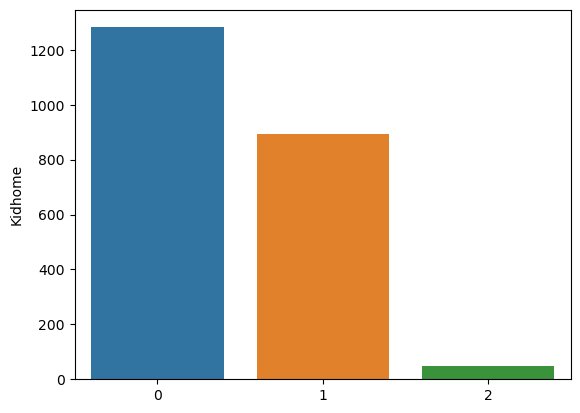

In [ ]:
sns.barplot(x=df['Kidhome'].value_counts().index, y=df['Kidhome'].value_counts())


## Teenhome

In [ ]:
df['Teenhome'].value_counts()

0    1148
1    1025
2      52
Name: Teenhome, dtype: int64

<Axes: ylabel='Teenhome'>

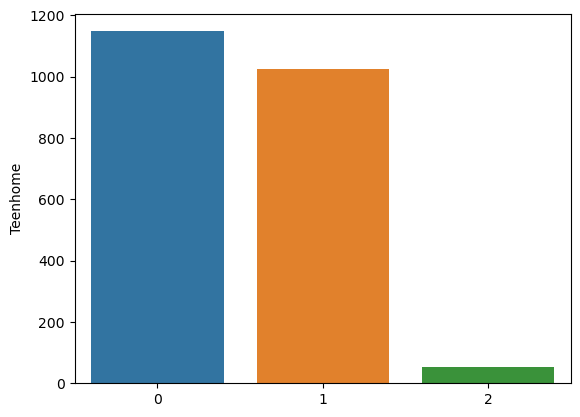

In [ ]:
sns.barplot(x=df['Teenhome'].value_counts().index, y=df['Teenhome'].value_counts())


## Feature Engineering
### Aggregation of kids at home and Teens at home


The newly created column 'Children_at_Home' aggregates the number of children in two age groups: kids and teens. Here's an interpretation of what it represents:

- For each row in the DataFrame, 'Children_at_Home' represents the total count of children at home, including both kids and teens.
- The values in this column are obtained by summing the values from the 'Kidhome' column (which indicates the number of kids at home) and the 'Teenhome' column (which indicates the number of teens at home).
- This aggregation provides a simplified view of the number of children residing in each household, regardless of their specific age groups.
- The 'Children_at_Home' column can be useful for analyzing family size or household composition, as it captures the total count of dependent children living in each household.

Overall, this new column adds valuable information to dataset by consolidating the counts of kids and teens at home into a single variable, facilitating further analysis of family demographics or related factors.

In [ ]:
df['Children_at_Home']=df['Kidhome']+df['Teenhome']

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3035283411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Children_at_Home']=df['Kidhome']+df['Teenhome']


In [ ]:
df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)


C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\1448002627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)


In [ ]:
df.head()

,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Education_Encoded,Children_at_Home
0,0,84835.00,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54,3,0
1,0,57091.00,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63,3,0
2,1,67267.00,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66,3,1
3,1,32474.00,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57,3,2
4,0,21474.00,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35,3,1


<Axes: xlabel='Children_at_Home', ylabel='count'>

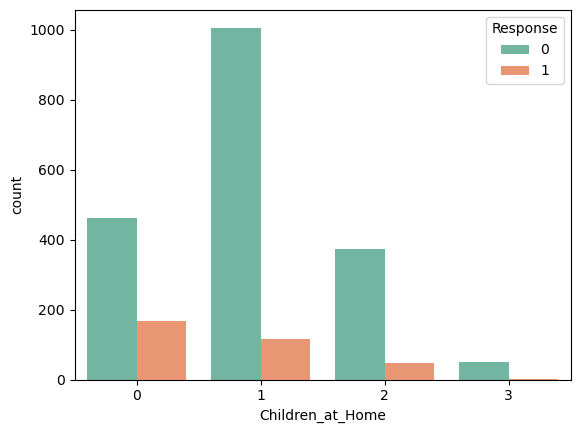

In [ ]:
sns.countplot(data=df, x='Children_at_Home', hue='Response', palette='Set2')

## Dt_Customer

In [ ]:
df.Dt_Customer.describe()

count          2225
unique          663
top       8/31/2012
freq             12
Name: Dt_Customer, dtype: object

This information indicates that the 'Dt_Customer' column contains date values representing the date when customers were acquired or registered. The most common registration date in the dataset is '8/31/2012', which occurs 12 times.

## Feature Engineering
###  Change date customer joined to customer days since joined


In [ ]:
import datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Days'] = (datetime.datetime.now() - df['Dt_Customer'])
df['Customer_Days'] = df['Customer_Days'].dt.days

df['Customer_Days'].describe()



C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2642687558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2642687558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer_Days'] = (datetime.datetime.now() - df['Dt_Customer'])
C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2642687558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

count   2225.00
mean    3920.97
std      232.13
min     3409.00
25%     3750.00
50%     3922.00
75%     4094.00
max     4472.00
Name: Customer_Days, dtype: float64

The descriptive statistics for the 'Customer_Days' column are as follows:

- Count: There are 2236 non-null values in the 'Customer_Days' column.
- Mean: The average number of days since the customer joined is approximately 3917.91 days.
- Standard Deviation (std): The standard deviation of the number of days since the customer joined is approximately 232.07 days. This measures the dispersion of values around the mean.
- Minimum (min): The minimum number of days since the customer joined is 3406 days.
- 25th Percentile (25%): 25% of customers have been with the business for 3746.75 days or fewer.
- Median (50%): The median number of days since the customer joined is 3919 days. This is the middle value of the sorted values.
- 75th Percentile (75%): 75% of customers have been with the business for 4091 days or fewer.
- Maximum (max): The maximum number of days since the customer joined is 4469 days.

These statistics provide insight into the distribution and summary of the duration since customers joined the business. It seems that the majority of customers have been with the business for around 3917 to 3919 days, with some variability around this average duration.


In [ ]:
df.drop('Dt_Customer' , axis=1 , inplace=True)

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\43286322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Dt_Customer' , axis=1 , inplace=True)


## Recency

In [ ]:
df['Recency'].describe()

count   2225.00
mean      49.14
std       28.94
min        0.00
25%       24.00
50%       50.00
75%       74.00
max       99.00
Name: Recency, dtype: float64

Mean-3 * standard Deviation: -37.67223917761498 
Mean+3* standard Deviation: 135.96077850345768

There is no outlier in 'Recency' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean      49.14
std       28.94
min        0.00
25%       24.00
50%       50.00
75%       74.00
max       99.00
Name: Recency, dtype: float64

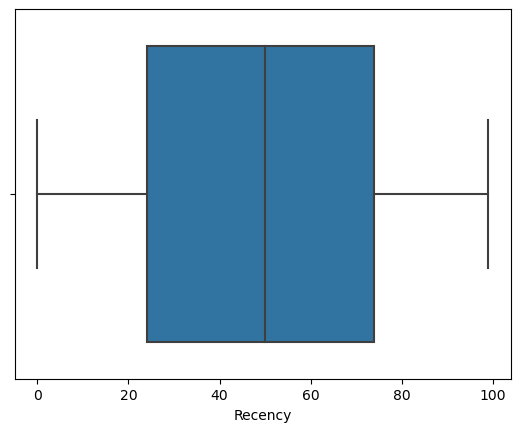

In [ ]:
outlier_detection(df,'Recency')

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\4054827587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Recency)


<Axes: xlabel='Recency', ylabel='Density'>

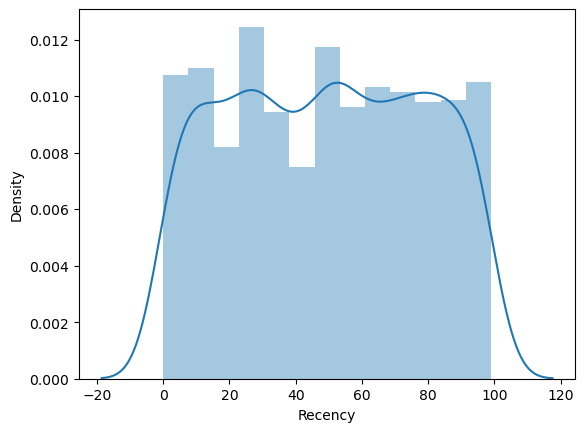

In [ ]:

sns.distplot(df.Recency)

## MntWines
The amount spent on Wine products in the last 2 years

In [ ]:
df['MntWines'].describe()

count   2225.00
mean     304.93
std      337.04
min        0.00
25%       24.00
50%      175.00
75%      505.00
max     1493.00
Name: MntWines, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\674497966.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MntWines)


<Axes: xlabel='MntWines', ylabel='Density'>

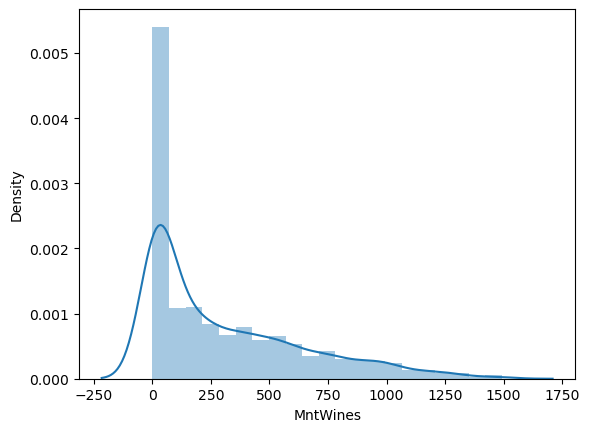

In [ ]:
sns.distplot(df.MntWines)

Mean-3 * standard Deviation: -706.1983921041889 
Mean+3* standard Deviation: 1316.0599651378966

There are some outliers in 'MntWines' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean     304.93
std      337.04
min        0.00
25%       24.00
50%      175.00
75%      505.00
max     1493.00
Name: MntWines, dtype: float64

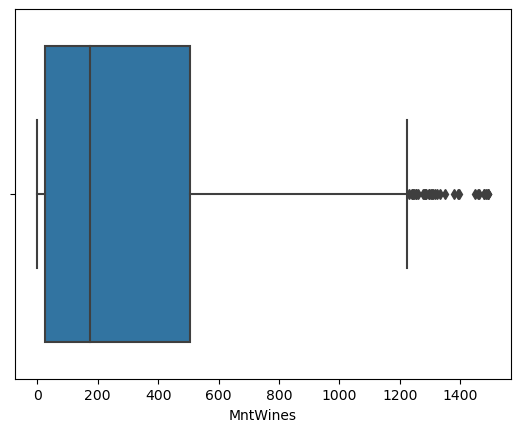

In [ ]:
outlier_detection(df,'MntWines')

Value of outliers make sense in our dataset, so we leave it as normal high values.¶

## MntFruits
The amount spent on fruits products in the last 2 years

In [ ]:
df['MntFruits'].describe()

count   2225.00
mean      26.32
std       39.75
min        0.00
25%        2.00
50%        8.00
75%       33.00
max      199.00
Name: MntFruits, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\4019948175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MntFruits)


<Axes: xlabel='MntFruits', ylabel='Density'>

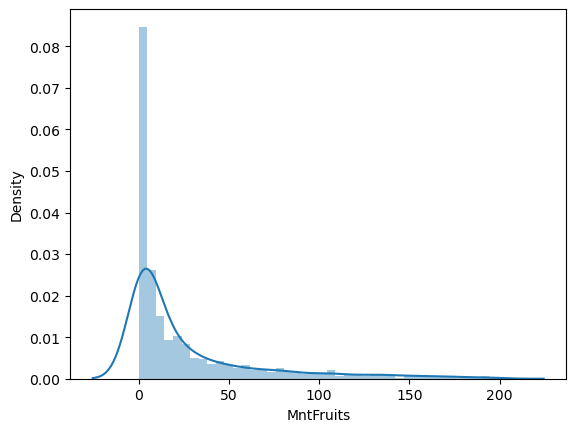

In [ ]:
sns.distplot(df.MntFruits)

Mean-3 * standard Deviation: -92.93851608509011 
Mean+3* standard Deviation: 145.57312282666314

There are some outliers in 'MntFruits' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean      26.32
std       39.75
min        0.00
25%        2.00
50%        8.00
75%       33.00
max      199.00
Name: MntFruits, dtype: float64

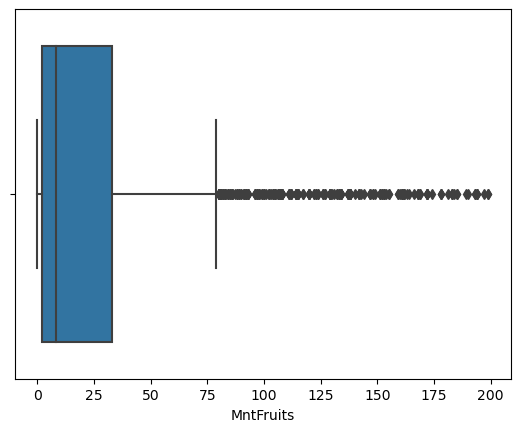

In [ ]:
outlier_detection(df,'MntFruits')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## MntMeatProducts
The amount spent on Meat products in the last 2 years

In [ ]:
df['MntMeatProducts'].describe()

count   2225.00
mean     165.26
std      219.39
min        0.00
25%       16.00
50%       67.00
75%      231.00
max     1725.00
Name: MntMeatProducts, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\216202121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MntMeatProducts)


<Axes: xlabel='MntMeatProducts', ylabel='Density'>

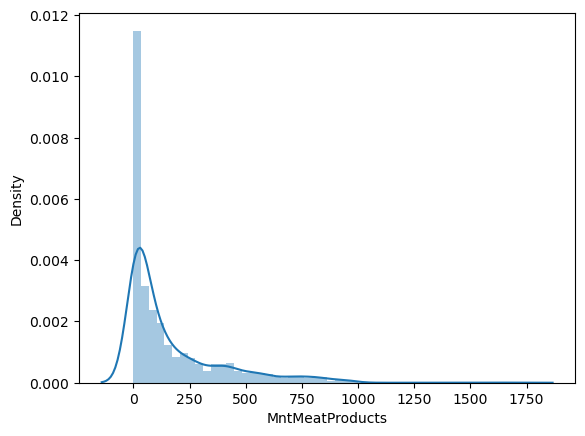

In [ ]:
sns.distplot(df.MntMeatProducts)

Mean-3 * standard Deviation: -492.9149621209524 
Mean+3* standard Deviation: 823.4255239187053

There are some outliers in 'MntMeatProducts' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean     165.26
std      219.39
min        0.00
25%       16.00
50%       67.00
75%      231.00
max     1725.00
Name: MntMeatProducts, dtype: float64

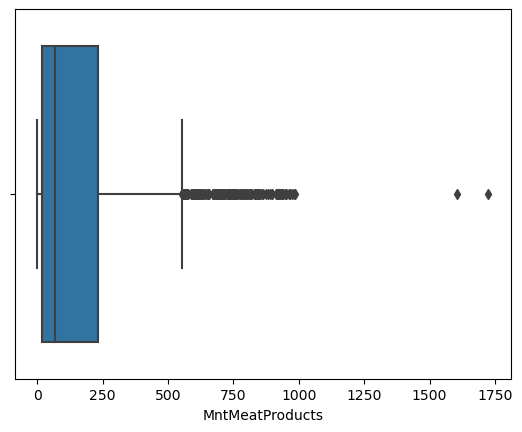

In [ ]:
outlier_detection(df,'MntMeatProducts')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## MntFishProducts
The amount spent on Fish products in the last 2 years

In [ ]:
df['MntFishProducts'].describe()

count   2225.00
mean      37.52
std       54.51
min        0.00
25%        3.00
50%       12.00
75%       50.00
max      259.00
Name: MntFishProducts, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2762736084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MntFishProducts)


<Axes: xlabel='MntFishProducts', ylabel='Density'>

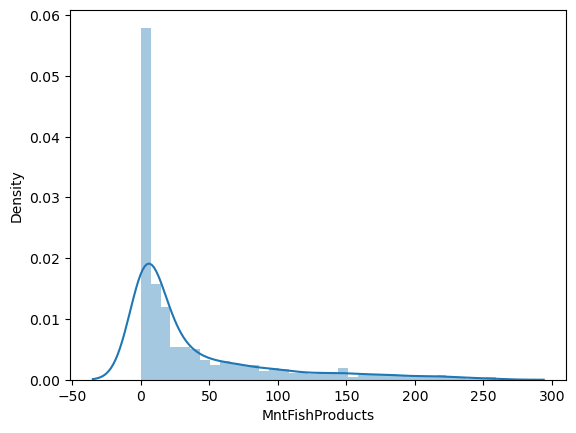

In [ ]:
sns.distplot(df.MntFishProducts)

Mean-3 * standard Deviation: -126.0022235603885 
Mean+3* standard Deviation: 201.0458190660065

There are some outliers in 'MntFishProducts' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean      37.52
std       54.51
min        0.00
25%        3.00
50%       12.00
75%       50.00
max      259.00
Name: MntFishProducts, dtype: float64

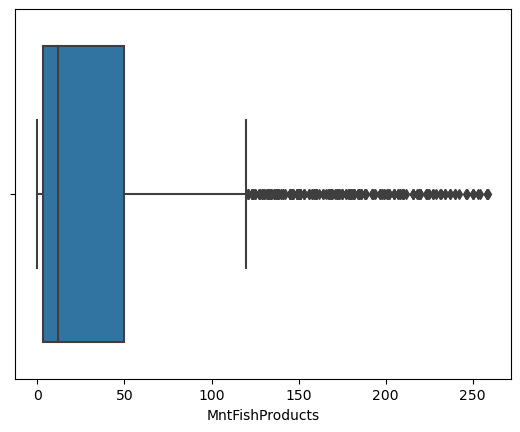

In [ ]:
outlier_detection(df,'MntFishProducts')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## MntSweetProducts
The amount spent on Fish products in the last 2 years

In [ ]:
df['MntSweetProducts'].describe()

count   2225.00
mean      27.18
std       41.36
min        0.00
25%        1.00
50%        8.00
75%       34.00
max      263.00
Name: MntSweetProducts, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2941239152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MntSweetProducts)


<Axes: xlabel='MntSweetProducts', ylabel='Density'>

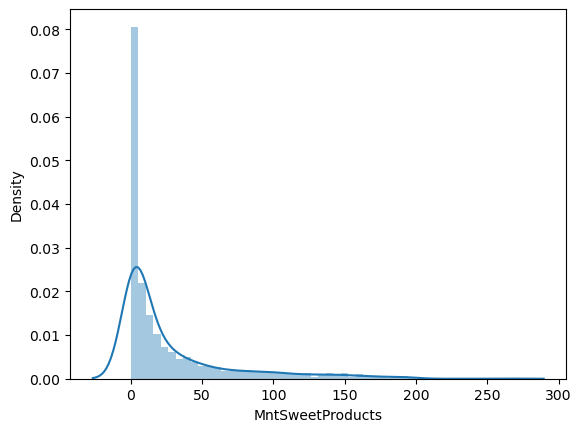

In [ ]:
sns.distplot(df.MntSweetProducts)

Mean-3 * standard Deviation: -96.89834056819532 
Mean+3* standard Deviation: 151.25879000639756

There are some outliers in 'MntSweetProducts' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean      27.18
std       41.36
min        0.00
25%        1.00
50%        8.00
75%       34.00
max      263.00
Name: MntSweetProducts, dtype: float64

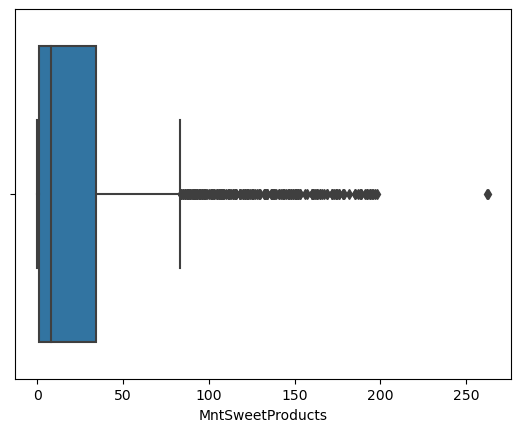

In [ ]:
outlier_detection(df,'MntSweetProducts')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## MntGoldProds
The amount spent on Gold products in the last 2 years

In [ ]:
df['MntGoldProds'].describe()

count   2225.00
mean      43.97
std       51.90
min        0.00
25%        9.00
50%       24.00
75%       56.00
max      362.00
Name: MntGoldProds, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3611943967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MntGoldProds)


<Axes: xlabel='MntGoldProds', ylabel='Density'>

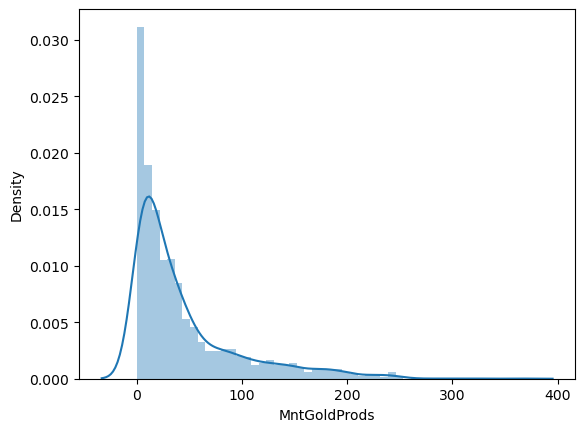

In [ ]:
sns.distplot(df.MntGoldProds)

Mean-3 * standard Deviation: -111.73582712419298 
Mean+3* standard Deviation: 199.67829903430535

There are some outliers in 'MntGoldProds' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean      43.97
std       51.90
min        0.00
25%        9.00
50%       24.00
75%       56.00
max      362.00
Name: MntGoldProds, dtype: float64

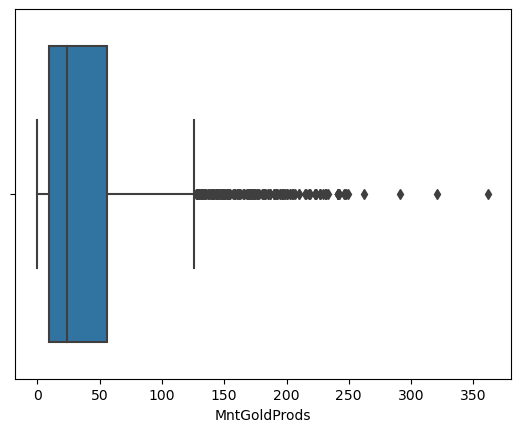

In [ ]:
outlier_detection(df,'MntGoldProds')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## Feature Engineering
### Aggregation of products sales amount

Our code aggregates the sales amounts of different products, providing two separate columns to analyze sales with and without gold products. This can be useful for understanding the contribution of gold products to overall sales or for conducting comparative analyses.

In [ ]:
# Aggregation of products sales amount with gold
df['Product_sales_withGold']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['Product_sales_withioutGold']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']


C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2353518844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_sales_withGold']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2353518844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Product_sales_withioutGold']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']


In [ ]:
df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'] , axis=1 , inplace=True)

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3562185793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'] , axis=1 , inplace=True)


C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\1335424113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Product_sales_withGold , fit=norm)


<Axes: xlabel='Product_sales_withGold', ylabel='Density'>

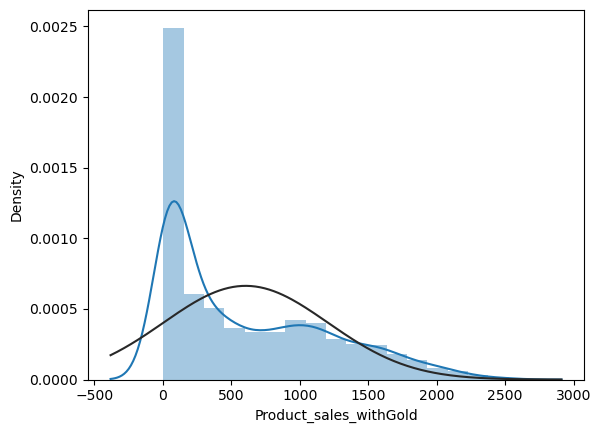

In [ ]:
sns.distplot(df.Product_sales_withGold , fit=norm)

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3213796848.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Product_sales_withioutGold , fit=norm)


<Axes: xlabel='Product_sales_withioutGold', ylabel='Density'>

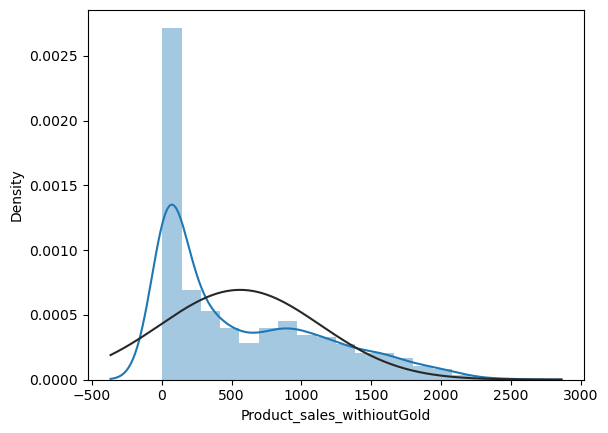

In [ ]:
sns.distplot(df.Product_sales_withioutGold , fit=norm)

In [ ]:

df[['Product_sales_withGold', 'Product_sales_withioutGold']].describe()

,Product_sales_withGold,Product_sales_withioutGold
count,2225.00,2225.00
mean,605.18,561.21
std,601.29,575.73
min,5.00,4.00
25%,69.00,55.00
50%,396.00,341.00
75%,1043.00,962.00
max,2525.00,2491.00


## NumDealsPurchases
Number of purchases made with discount

In [ ]:
df['NumDealsPurchases'].describe()

count   2225.00
mean       2.32
std        1.89
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       15.00
Name: NumDealsPurchases, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3812384841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.NumDealsPurchases)


<Axes: xlabel='NumDealsPurchases', ylabel='Density'>

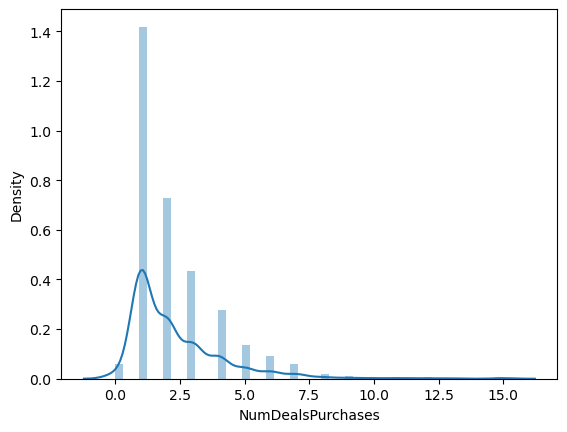

In [ ]:
sns.distplot(df.NumDealsPurchases)

Mean-3 * standard Deviation: -3.3672148609681725 
Mean+3* standard Deviation: 8.002720478945701

There are some outliers in 'NumDealsPurchases' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean       2.32
std        1.89
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       15.00
Name: NumDealsPurchases, dtype: float64

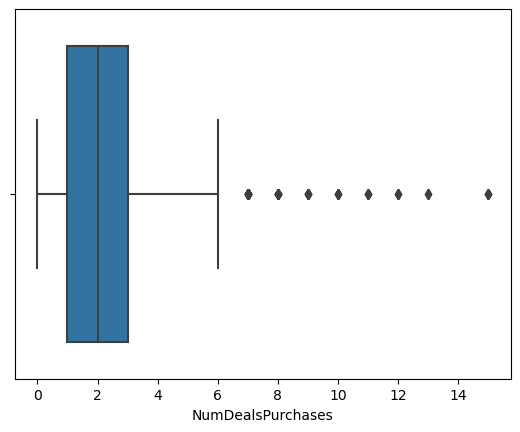

In [ ]:
outlier_detection(df,'NumDealsPurchases')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## NumWebPurchases
Number of purchases made through the company's website

In [ ]:
df['NumWebPurchases'].describe()

count   2225.00
mean       4.10
std        2.78
min        0.00
25%        2.00
50%        4.00
75%        6.00
max       27.00
Name: NumWebPurchases, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\1817956301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.NumWebPurchases)


<Axes: xlabel='NumWebPurchases', ylabel='Density'>

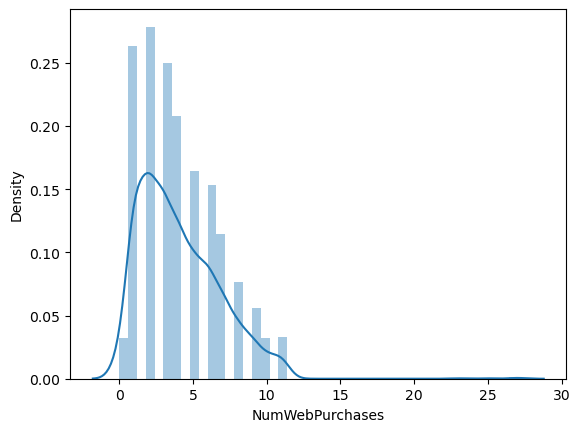

In [ ]:
sns.distplot(df.NumWebPurchases)

Mean-3 * standard Deviation: -4.2315057336331146 
Mean+3* standard Deviation: 12.42746078981289

There are some outliers in 'NumWebPurchases' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean       4.10
std        2.78
min        0.00
25%        2.00
50%        4.00
75%        6.00
max       27.00
Name: NumWebPurchases, dtype: float64

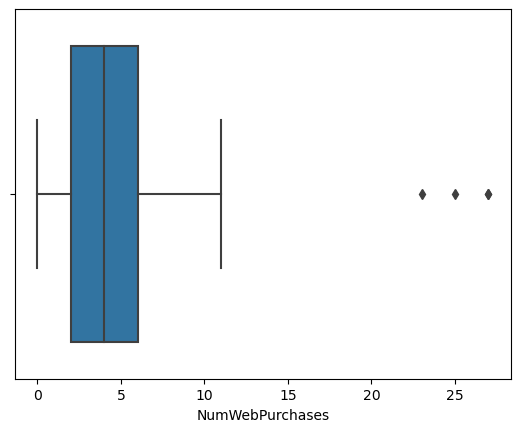

In [ ]:
outlier_detection(df,'NumWebPurchases')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## NumCatalogPurchases
Number of purchases made through the Catalog

In [ ]:
df['NumCatalogPurchases'].describe()

count   2225.00
mean       2.63
std        2.79
min        0.00
25%        0.00
50%        2.00
75%        4.00
max       28.00
Name: NumCatalogPurchases, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\1623910718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.NumCatalogPurchases)


<Axes: xlabel='NumCatalogPurchases', ylabel='Density'>

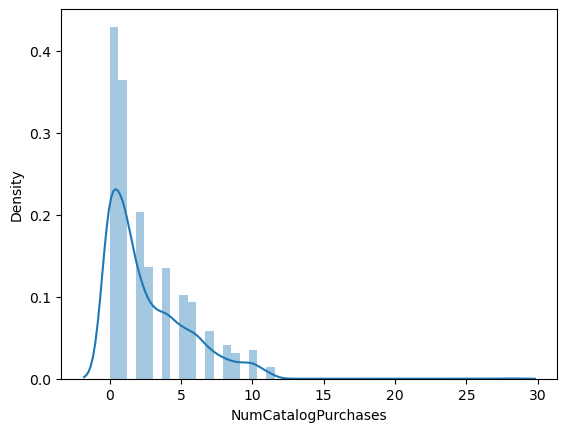

In [ ]:
sns.distplot(df.NumCatalogPurchases)

Mean-3 * standard Deviation: -5.746592111192662 
Mean+3* standard Deviation: 11.01400784152974

There are some outliers in 'NumCatalogPurchases' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean       2.63
std        2.79
min        0.00
25%        0.00
50%        2.00
75%        4.00
max       28.00
Name: NumCatalogPurchases, dtype: float64

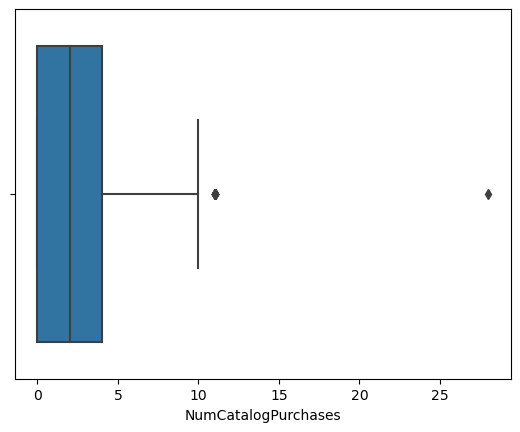

In [ ]:
outlier_detection(df,'NumCatalogPurchases')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## NumStorePurchases
Number of purchases made through the Store

In [ ]:
df['NumStorePurchases'].describe()

count   2225.00
mean       5.81
std        3.24
min        0.00
25%        3.00
50%        5.00
75%        8.00
max       13.00
Name: NumStorePurchases, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\4175099048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.NumStorePurchases)


<Axes: xlabel='NumStorePurchases', ylabel='Density'>

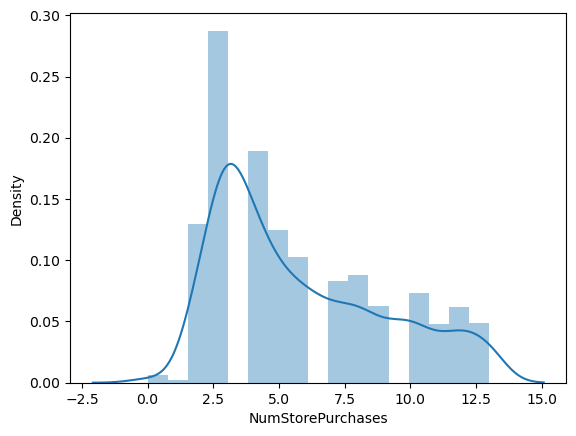

In [ ]:
sns.distplot(df.NumStorePurchases)

Mean-3 * standard Deviation: -3.9231733909075004 
Mean+3* standard Deviation: 15.546544177424355

There is no outlier in 'NumStorePurchases' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean       5.81
std        3.24
min        0.00
25%        3.00
50%        5.00
75%        8.00
max       13.00
Name: NumStorePurchases, dtype: float64

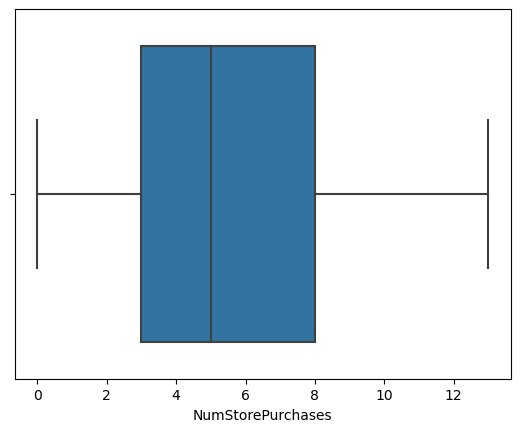

In [ ]:
outlier_detection(df,'NumStorePurchases')

## Feature Engineering
###  Agregation of Number of purchases

By aggregating the number of purchases from different channels into a single column, we created a consolidated view of the total number of purchases made by each customer, regardless of the purchase channel.

This aggregated column 'Num_purchases' can be useful for analyzing the overall purchasing behavior of customers and for conducting various analyses or modeling tasks based on the total number of purchases.

In [ ]:

df['Num_purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3246574825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']


In [ ]:
df.drop(['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], axis=1 , inplace=True)

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2047031912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], axis=1 , inplace=True)


C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\3100049250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Num_purchases ,fit=norm)


<Axes: xlabel='Num_purchases', ylabel='Density'>

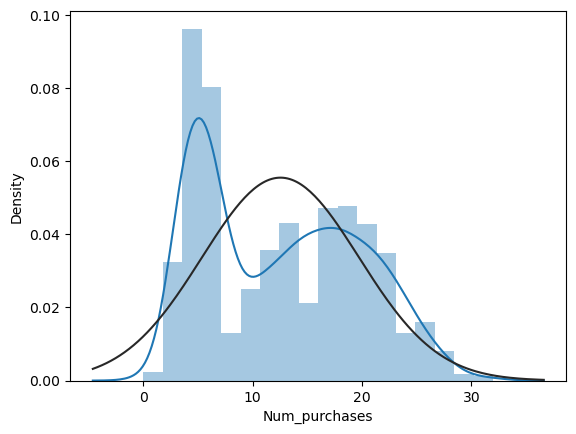

In [ ]:
sns.distplot(df.Num_purchases ,fit=norm)

In [ ]:
df['Num_purchases'].describe()

count   2225.00
mean      12.54
std        7.19
min        0.00
25%        6.00
50%       12.00
75%       18.00
max       32.00
Name: Num_purchases, dtype: float64

These statistics provide insight into the distribution and summary of the total number of purchases made by customers. The average number of purchases is approximately 12.53, with some variability around this average. The minimum value of 0 suggests that there are customers who have not made any purchases, while the maximum value of 32 indicates the highest level of purchasing activity observed in the dataset.

## NumWebVisitsMonth
Number of purchases made through the company's website

In [ ]:
df['NumWebVisitsMonth'].describe()

count   2225.00
mean       5.34
std        2.41
min        0.00
25%        3.00
50%        6.00
75%        7.00
max       20.00
Name: NumWebVisitsMonth, dtype: float64

C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\801940549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.NumWebVisitsMonth)


<Axes: xlabel='NumWebVisitsMonth', ylabel='Density'>

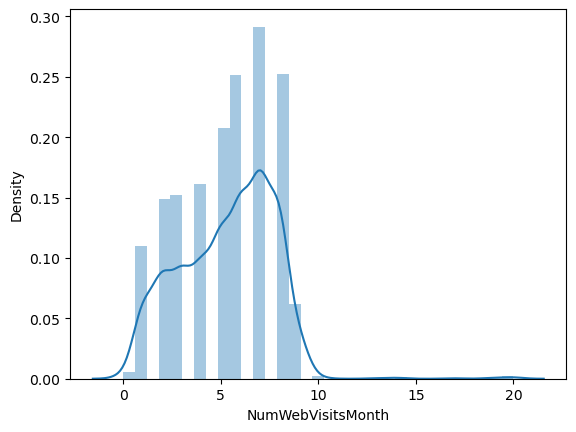

In [ ]:
sns.distplot(df.NumWebVisitsMonth)

Mean-3 * standard Deviation: -1.9038552199452115 
Mean+3* standard Deviation: 12.574417017698021

There are some outliers in 'NumWebVisitsMonth' based on 'Mean and Standard Deviation Method' in the dataset that you give to this function


count   2225.00
mean       5.34
std        2.41
min        0.00
25%        3.00
50%        6.00
75%        7.00
max       20.00
Name: NumWebVisitsMonth, dtype: float64

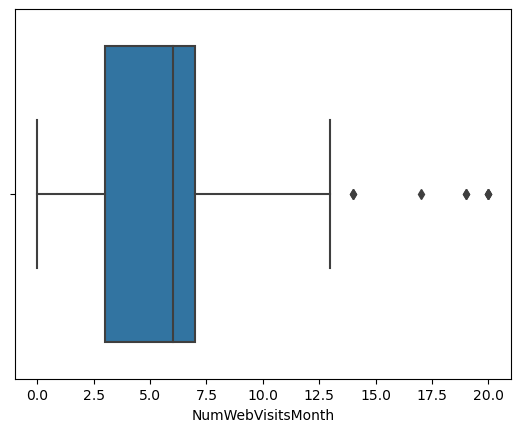

In [ ]:
outlier_detection(df,'NumWebVisitsMonth')

Value of outliers make sense in our dataset, so we leave it as normal high values.

## Complain

In [ ]:
df['Complain'].value_counts()

0    2205
1      20
Name: Complain, dtype: int64

<Axes: ylabel='Complain'>

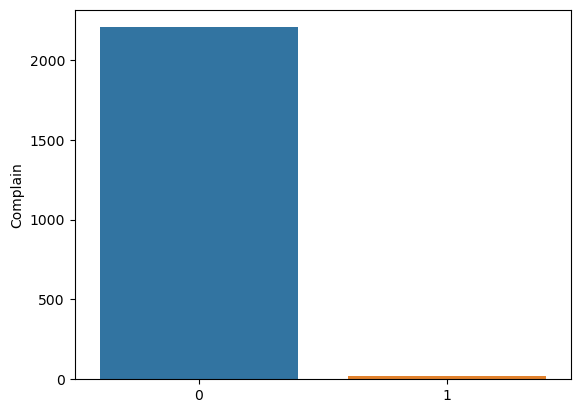

In [ ]:
sns.barplot(x=df['Complain'].value_counts().index , y=df['Complain'].value_counts())


<Axes: xlabel='Complain', ylabel='count'>

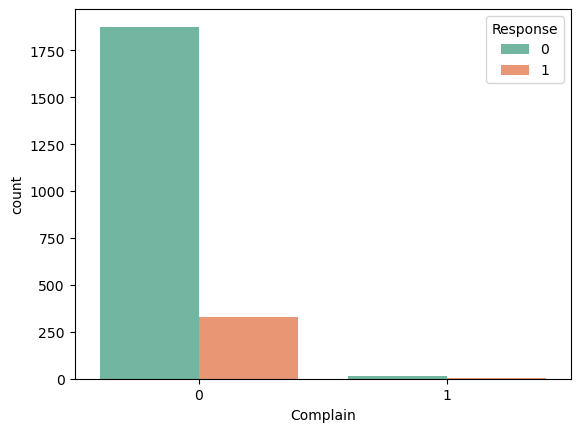

In [ ]:
sns.countplot(data=df, x='Complain', hue='Response', palette='Set2')

## Response
Target Value

In [ ]:
df['Response'].value_counts()

0    1893
1     332
Name: Response, dtype: int64

<Axes: ylabel='Response'>

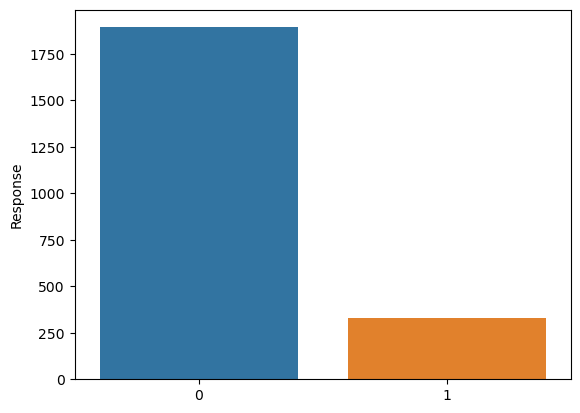

In [ ]:
sns.barplot(x=df['Response'].value_counts().index , y=df['Response'].value_counts())


TypeError: 'str' object is not callable

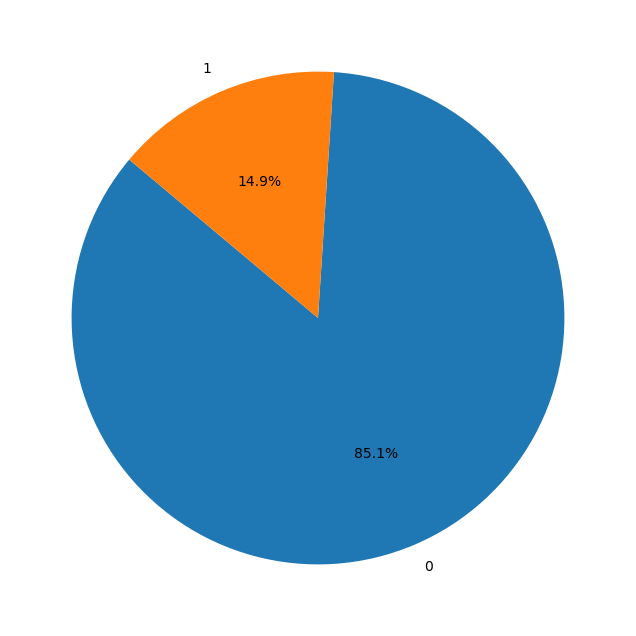

In [ ]:
import matplotlib.pyplot as plt

# Get value counts of 'Response' column
response_counts = df['Response'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Responses')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### Target Value is highly imbalanced

In [ ]:
# Percentage of customers who response to the promotion offer
Total_Customers = len(df)
Positive_Response = df[df['Response'] == 1]['Response'].count()
Negative_Response = df[df['Response'] == 0]['Response'].count()

Percentage_Positive = (Positive_Response / Total_Customers) * 100
Percentage_Negative = (Negative_Response / Total_Customers) * 100

print(f"Percentage of customers who had a positive response to the Promotion Offer: {Percentage_Positive:.2f}%")
print(f"Percentage of customers who had a negative response to the Promotion Offer: {Percentage_Negative:.2f}%")


Percentage of customers who had a positive response to the Promotion Offer: 14.92%
Percentage of customers who had a negative response to the Promotion Offer: 85.08%


The analysis shows the distribution of responses to a promotion offer among customers in our dataset:

- Total Customers: The total number of customers in the dataset.
- Positive Response: The number of customers who responded positively to the promotion offer.
- Negative Response: The number of customers who responded negatively to the promotion offer.
- Percentage of Positive Response: The percentage of customers who responded positively to the promotion offer out of the total number of customers.
- Percentage of Negative Response: The percentage of customers who responded negatively to the promotion offer out of the total number of customers.

From the calculated percentages:

- Around 14.85% of customers responded positively to the promotion offer.
- Approximately 85.15% of customers responded negatively to the promotion offer.

This suggests a significant imbalance in the dataset, with a large majority of customers having a negative response compared to those with a positive response.

In practical terms, this imbalance means that the model might be biased towards predicting negative responses since there are more negative instances in the dataset. It's crucial to address this imbalance during model training to ensure that the model can effectively learn from both positive and negative instances.


### Year of Birth Distribution by Response Status

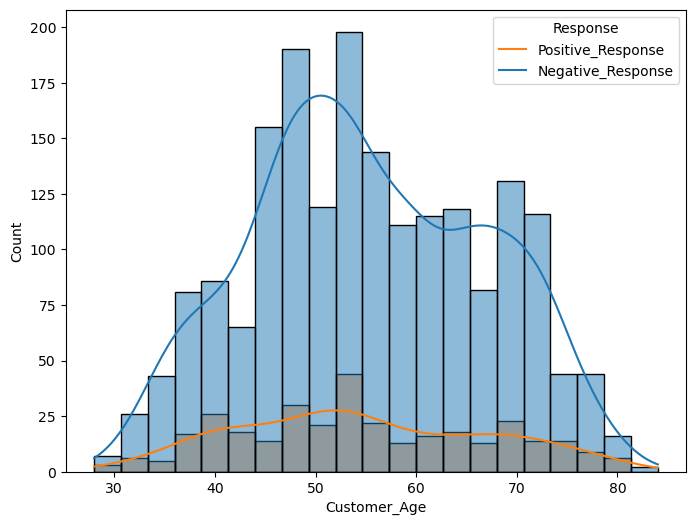

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='Customer_Age', hue='Response', kde=True)
plt.legend(title='Response', loc='upper right', labels=['Positive_Response', 'Negative_Response'])
plt.show()

Insight:

- Customers who are older show a higher tendency to Negative Response, indicating not to be prone to accept the Gold Membership offer.
- Conversley , customers who were born between 1960-1980 exhibits a greater tendency to accept Gold Membership offer.


### Income Distribution by Response status

<Axes: xlabel='Response', ylabel='Income'>

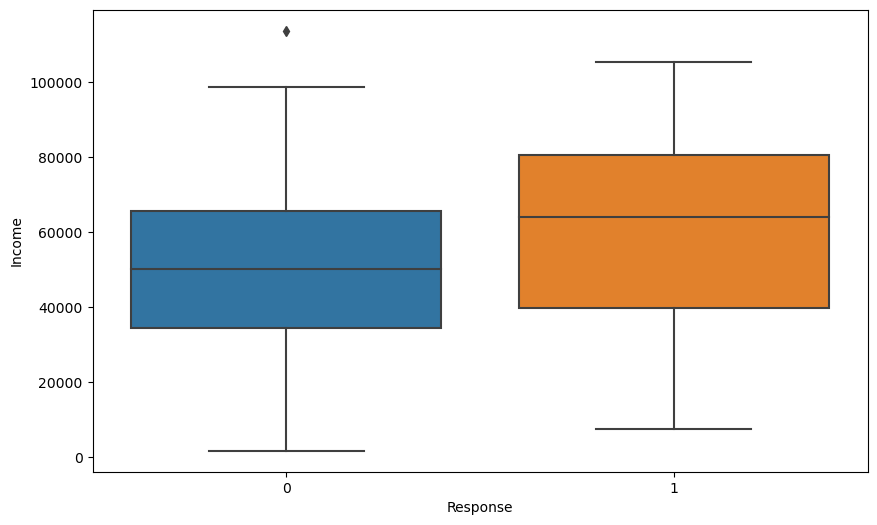

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Income', data=df)


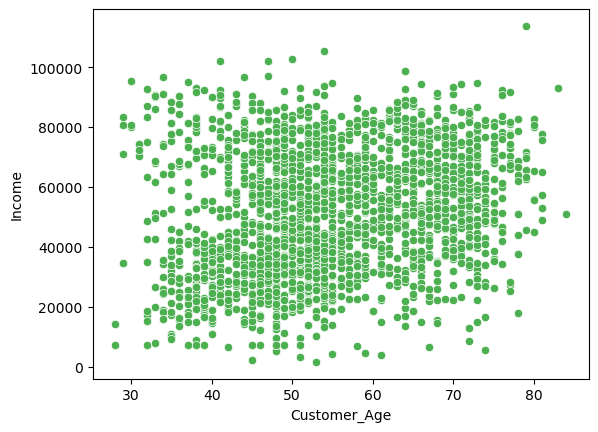

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='Customer_Age', y='Income', ax=ax, color='#4CAF50')

plt.show()

In [ ]:
columns_to_convert = ['Recency', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
                      'Customer_Age', 'Education_Encoded', 'Children_at_Home', 'Customer_Days',
                      'Product_sales_withGold', 'Product_sales_withioutGold', 'Num_purchases','Marital_Status']

# Convert integer columns to float
df[columns_to_convert] = df[columns_to_convert].astype(float)

# Check the data types after conversion
print(df.dtypes)

Marital_Status                float64
Income                        float64
Recency                       float64
NumDealsPurchases             float64
NumWebVisitsMonth             float64
Response                      float64
Complain                      float64
Customer_Age                  float64
Education_Encoded             float64
Children_at_Home              float64
Customer_Days                 float64
Product_sales_withGold        float64
Product_sales_withioutGold    float64
Num_purchases                 float64
dtype: object


C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\2560079727.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_convert] = df[columns_to_convert].astype(float)


This process is useful when we want to ensure consistency in data types across different columns or when we need to perform numerical operations that require float data type.

In summary, the code ensures that the specified columns in the DataFrame are treated as float values, which may be necessary for certain analyses or computations.

## Bivariate Analysis

Bivariate analysis involves exploring the relationship between two variables in a dataset. This analysis can help uncover patterns, associations, or dependencies between the variables.

### Correlation

Correlation Analysis: Correlation analysis measures the strength and direction of the linear relationship between two continuous variables. The correlation coefficient, typically Pearson's correlation coefficient, quantifies this relationship, with values ranging from -1 to 1. A value close to 1 indicates a strong positive correlation, close to -1 indicates a strong negative correlation, and close to 0 indicates no linear correlation.

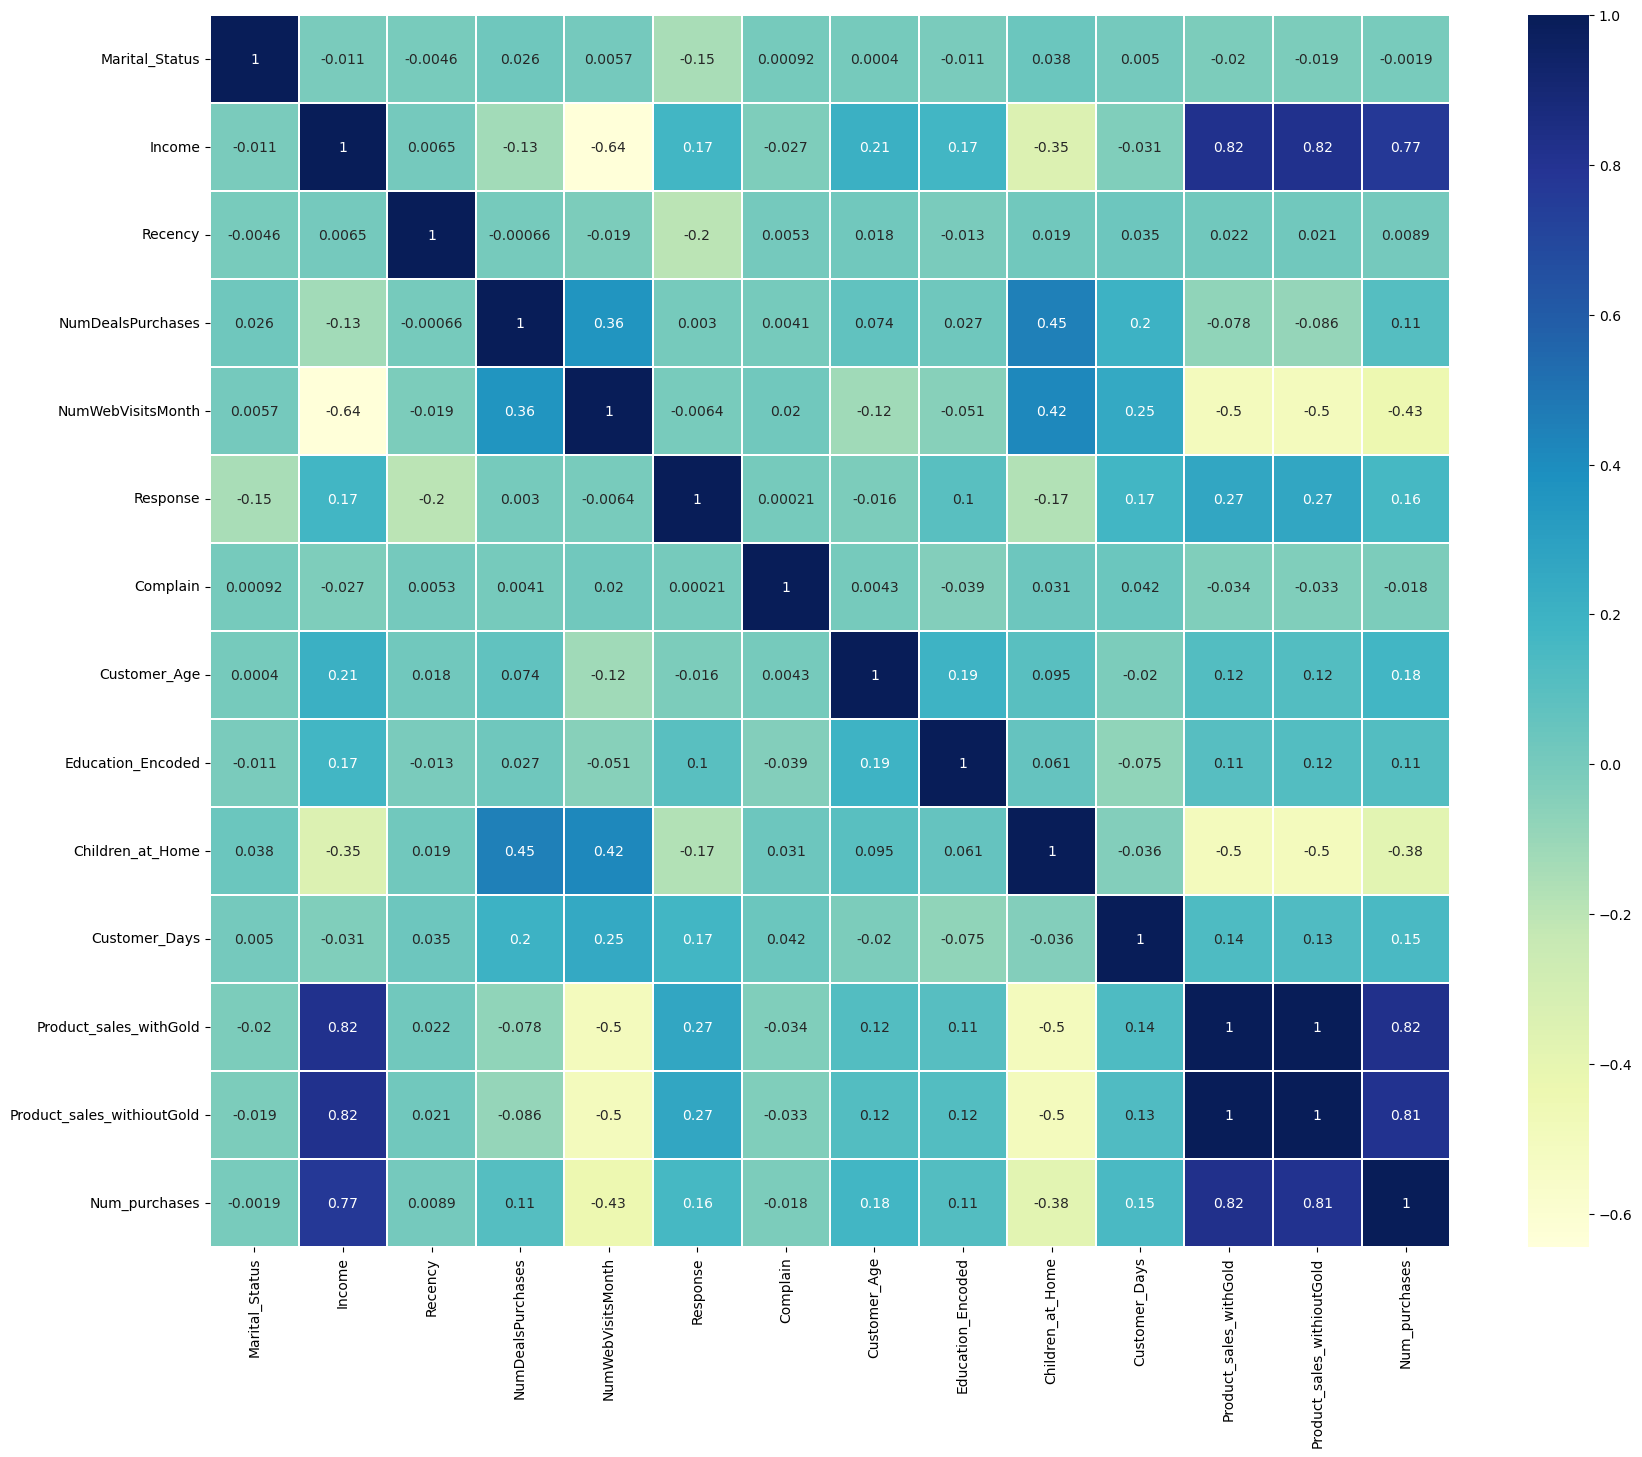

In [ ]:
corr = df.corr()
plt.figure(figsize=(20, 16))
ax = sns.heatmap(corr,
                 xticklabels=corr.columns,
                 yticklabels=corr.columns,
                 linewidths=0.2,
                 cmap="YlGnBu",
                 annot=True)

Positive Correlation:

- Customer_Days (0.27)
- Product_sales_withGold (0.27)
- Product_sales_withoutGold (0.27)

Negative Correlation:

- Recency (-0.20)
- Income (0.17)
- Children_at_Home (-0.17)

These correlations indicate the strength and direction of the linear relationship between each feature and the 'Response' variable:

- Features with positive correlations have a positive impact on the likelihood of a positive response to the promotion offer.
- Features with negative correlations have a negative impact on the likelihood of a positive response to the promotion offer.

The absolute value of the correlation coefficient indicates the strength of the relationship, where values closer to 1 indicate a stronger relationship.


It's important to note that correlation does not imply causation, and other factors may also influence customer response to the promotion offer. Further analysis and modeling may be necessary to understand the relationships more deeply and make informed decisions.


## chi2_contingency test

In [ ]:
categorical_cols = ['Education_Encoded', 'Marital_Status', 'Children_at_Home','Complain']

In [ ]:
from scipy.stats import chi2_contingency

# Loop through each categorical variable
for column in categorical_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df['Response'], df[column])

    # Perform the chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Check significance level (alpha = 0.05)
    if p_value < 0.05:
        print(f"{column}: p-value = {p_value} (Statistically significant)")
    else:
        print(f"{column}: p-value = {p_value} (Not statistically significant)")


Education_Encoded: p-value = 0.00011250511900561211 (Statistically significant)
Marital_Status: p-value = 4.019522659109686e-12 (Statistically significant)
Children_at_Home: p-value = 6.636101814891077e-21 (Statistically significant)
Complain: p-value = 1.0 (Not statistically significant)


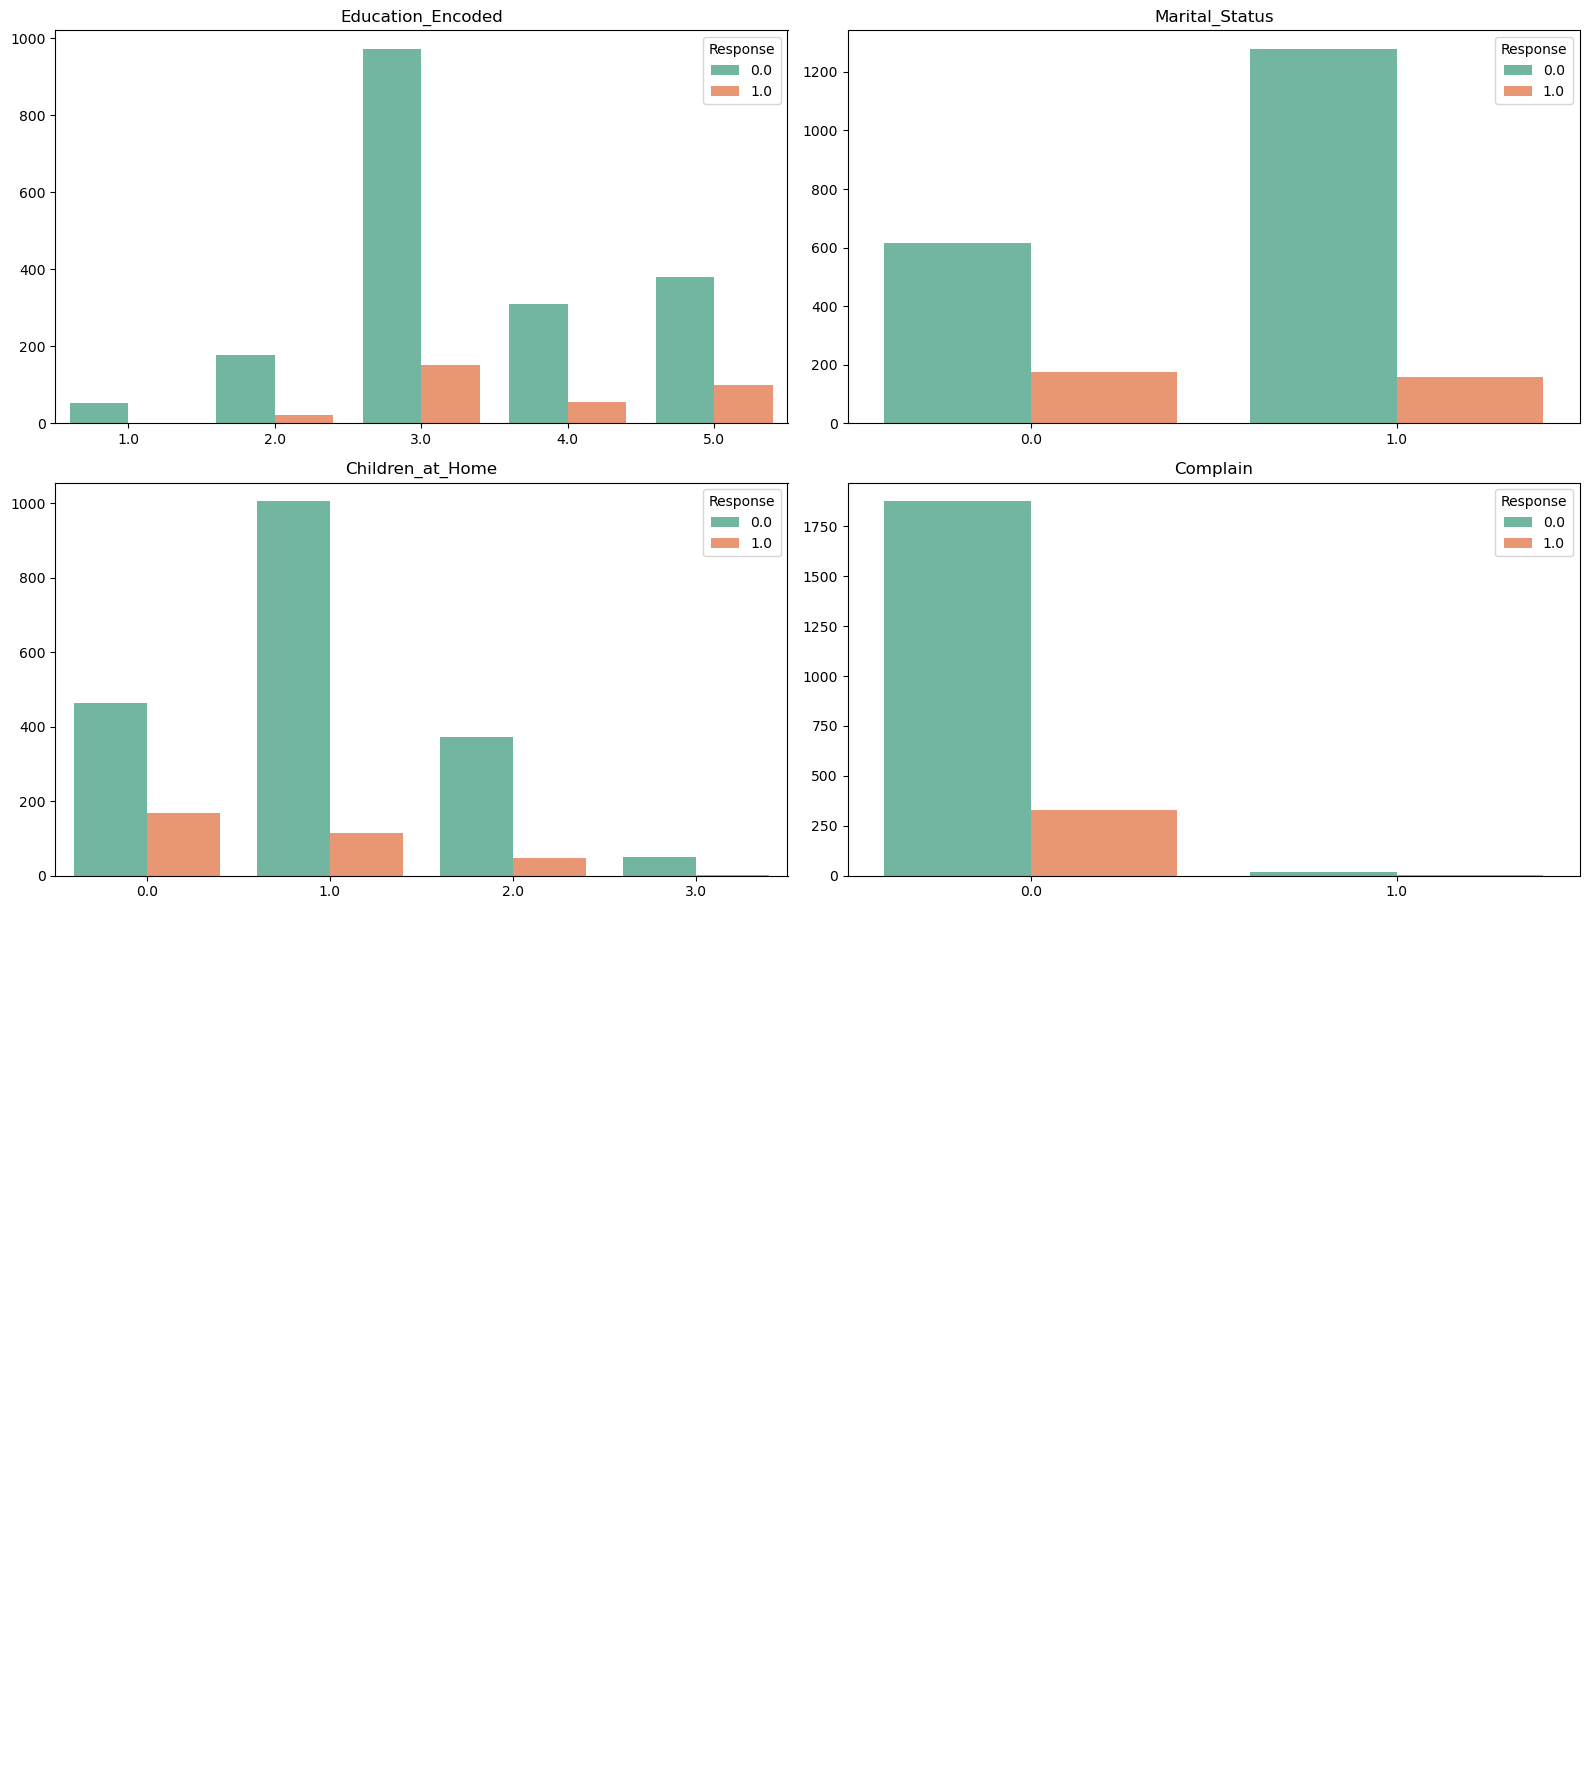

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(16, 18))

cont = 0
for i in range(4):
    for j in range(2):
        if cont < len(categorical_cols):
            sns.countplot(data=df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')
            ax[i][j].set_title(categorical_cols[cont])
            ax[i][j].set_ylabel('')
            ax[i][j].set_xlabel('')
            cont += 1
        else:
            ax[i][j].axis('off')  # Turn off axis if there are no more categorical columns to plot

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


## t-test

In [ ]:
continuous_cols = ['Product_sales_withGold', 'Product_sales_withioutGold','Income' ,'Recency','NumDealsPurchases','NumWebVisitsMonth','Customer_Age','Num_purchases']

In [ ]:
from scipy.stats import ttest_ind

# Loop through each continuous variable
for column in continuous_cols:
    # Perform t-test
    response_yes = df[df['Response'] == 1][column]
    response_no = df[df['Response'] == 0][column]
    t_statistic, p_value = ttest_ind(response_yes, response_no, equal_var=False)

    # Check significance level (alpha = 0.05)
    if p_value < 0.05:
        print(f"{column}: p-value = {p_value} (Statistically significant)")
    else:
        print(f"{column}: p-value = {p_value} (Not statistically significant)")


Product_sales_withGold: p-value = 3.181206465302729e-24 (Statistically significant)
Product_sales_withioutGold: p-value = 1.2588005298013356e-23 (Statistically significant)
Income: p-value = 6.094446902825249e-13 (Statistically significant)
Recency: p-value = 1.3410435650114339e-20 (Statistically significant)
NumDealsPurchases: p-value = 0.8971988116962785 (Not statistically significant)
NumWebVisitsMonth: p-value = 0.7728847809095503 (Not statistically significant)
Customer_Age: p-value = 0.4638120869922264 (Not statistically significant)
Num_purchases: p-value = 5.7404032540181145e-15 (Statistically significant)


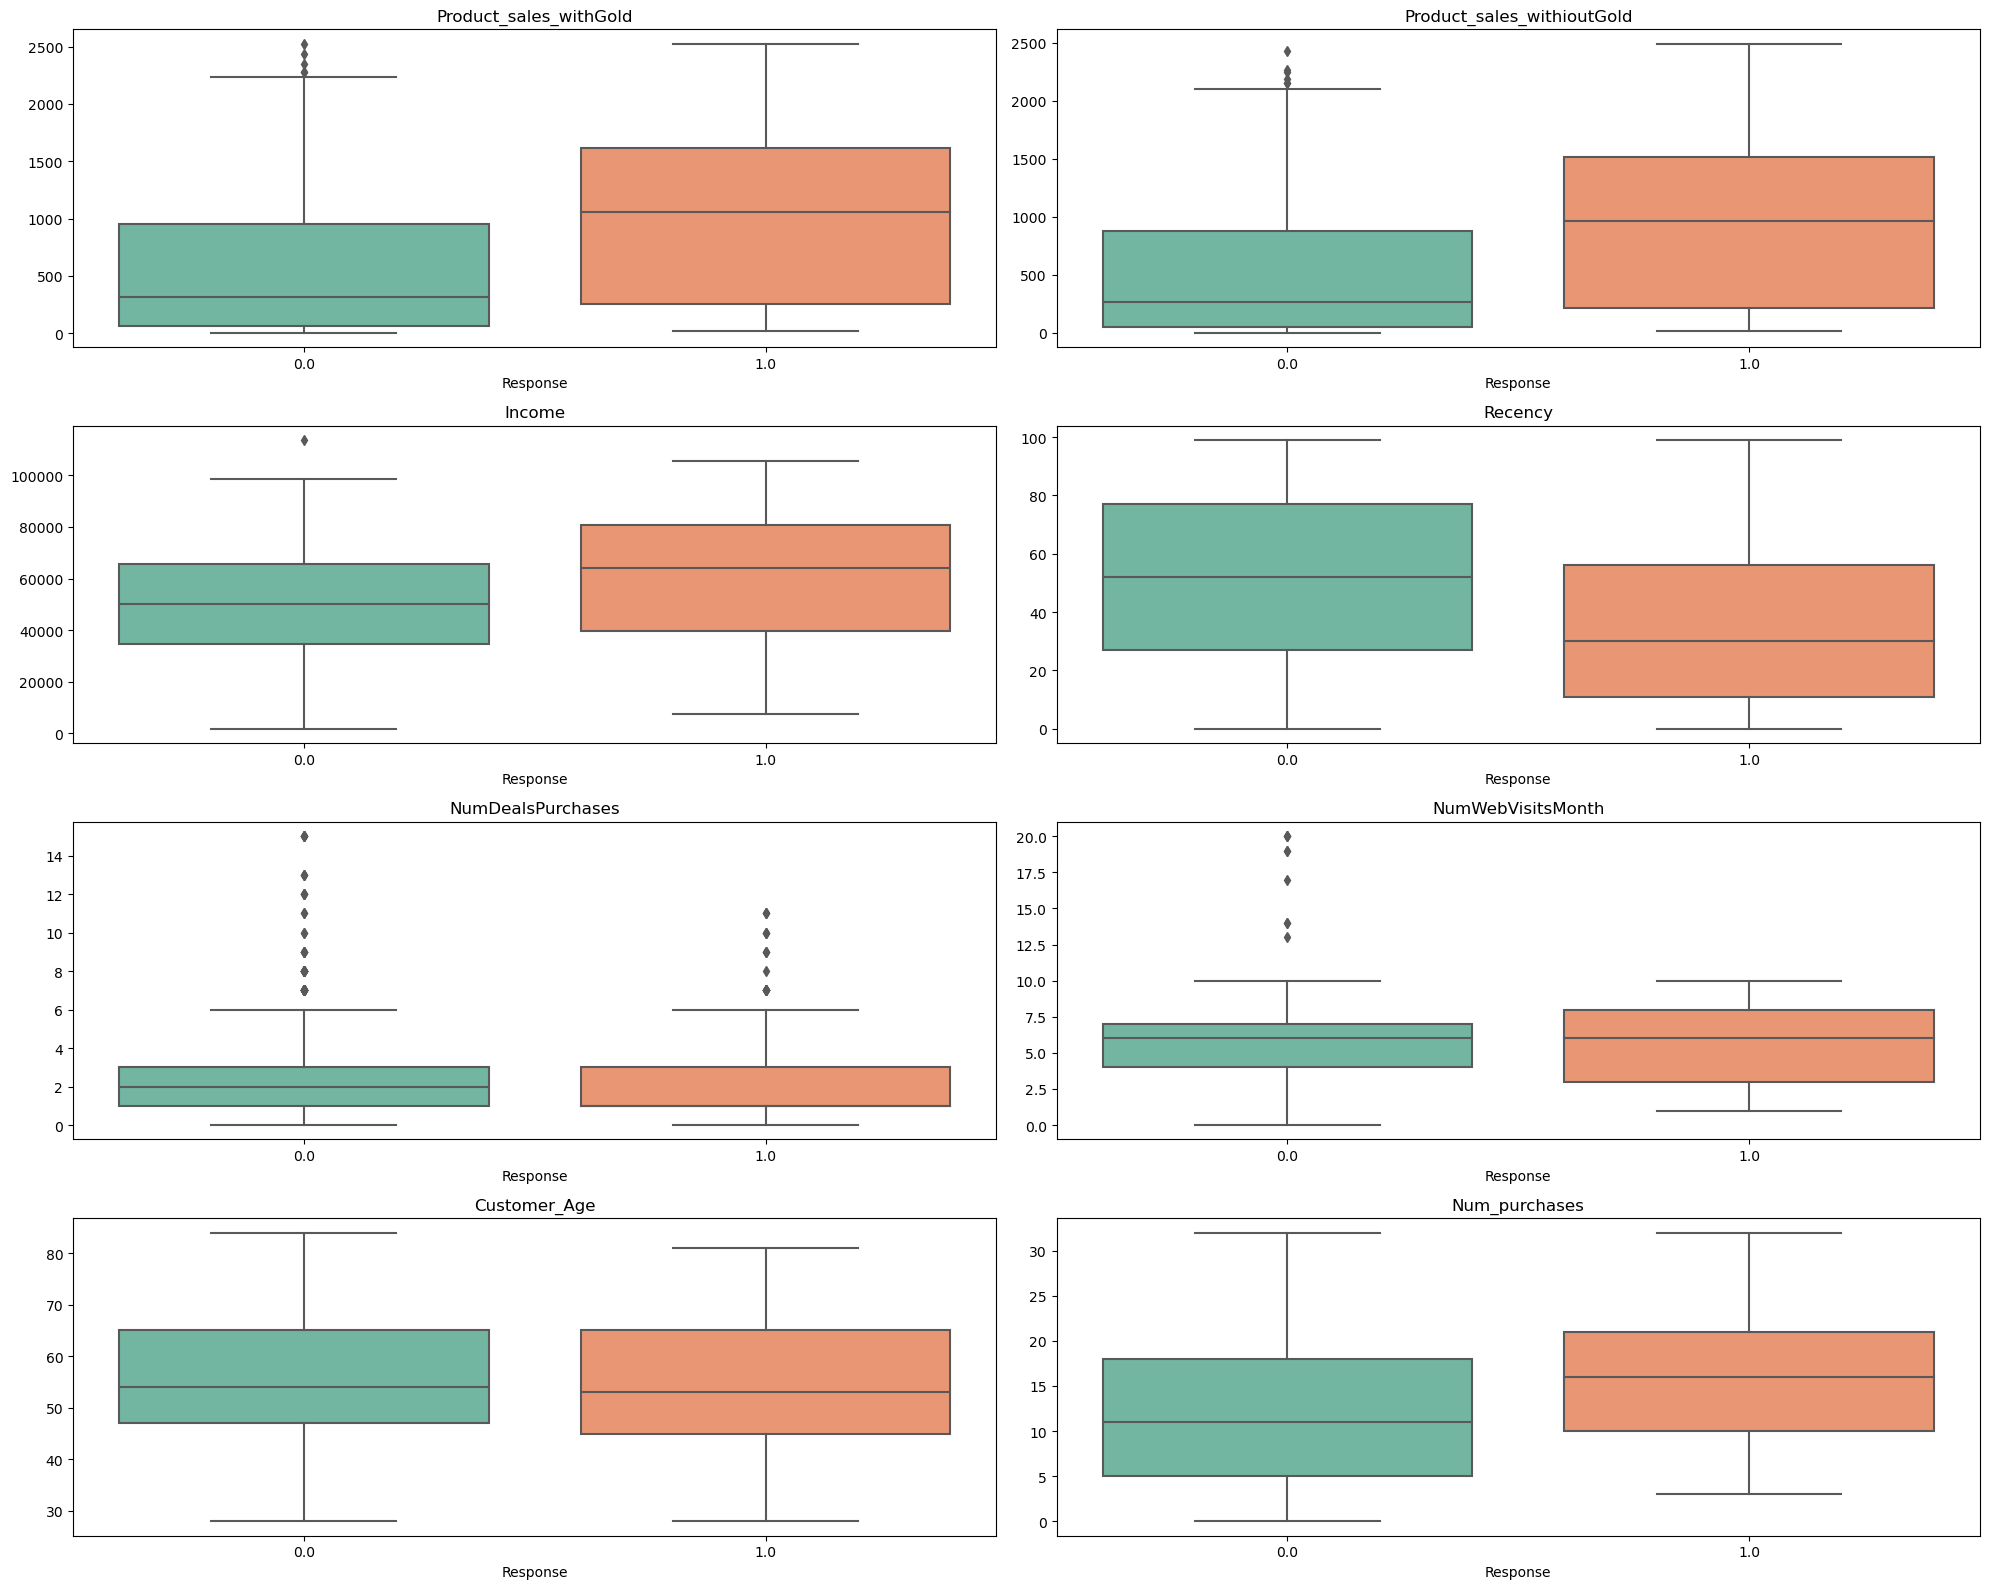

In [ ]:
num_rows = len(continuous_cols) // 2 + len(continuous_cols) % 2  # Integer division to get the number of rows
num_cols = 2

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20, 16))

ax = ax.flatten()

for i in range(len(continuous_cols)):
    sns.boxplot(data=df, y=continuous_cols[i], x='Response', ax=ax[i], palette='Set2')
    ax[i].set_title(continuous_cols[i])
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Response')

if len(continuous_cols) % 2 != 0:
    for j in range(len(continuous_cols), num_rows * num_cols):
        fig.delaxes(ax[j])

plt.tight_layout()
plt.show()



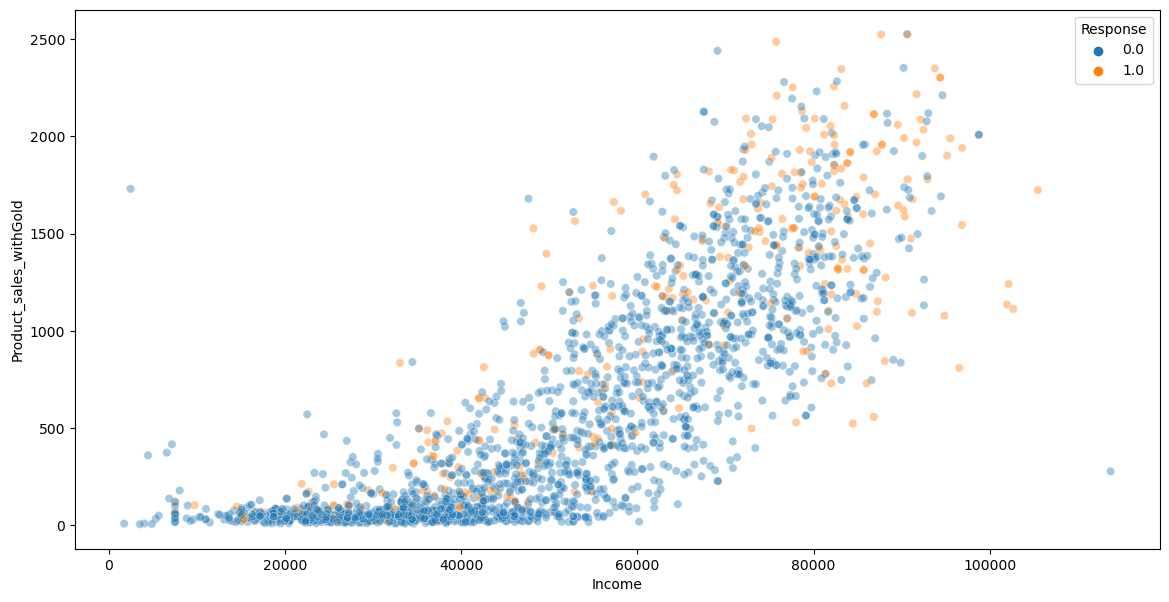

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Income', y='Product_sales_withGold', hue='Response', alpha=0.4)
plt.title:'Income vs regular spent';

## Normality Test
### D'Agostino-Pearson K2 Test

The D'Agostino-Pearson K2 test is a statistical test used to assess whether a given sample comes from a population with a normal distribution. It's a omnibus test, meaning it tests the hypothesis that the data comes from a normal distribution without making specific assumptions about the mean and standard deviation of the population.

Here's how the D'Agostino-Pearson K2 test works:

- Null Hypothesis (H0): The null hypothesis states that the sample data is drawn from a normally distributed population.

- Alternative Hypothesis (H1): The alternative hypothesis suggests that the sample data is not drawn from a normally distributed population.

- Test Statistic: The D'Agostino-Pearson K2 test statistic is calculated based on the sample data. It measures the discrepancy between the sample distribution and a normal distribution.

- P-value: The test generates a p-value, which indicates the probability of observing the test statistic or more extreme values if the null hypothesis is true. A low p-value suggests that the null hypothesis can be rejected, indicating that the data does not follow a normal distribution.

In [ ]:
from scipy import stats

normaltest_results = {}

for column in df.columns:

    stat, p_value = stats.normaltest(df[column].dropna())


    normaltest_results[column] = {'statistic': stat, 'p-value': p_value}

normaltest_df = pd.DataFrame(normaltest_results).T

print(normaltest_df)


                            statistic  p-value
Marital_Status               11160.39     0.00
Income                         210.15     0.00
Recency                       1822.69     0.00
NumDealsPurchases             1136.42     0.00
NumWebVisitsMonth              117.14     0.00
Response                       750.00     0.00
Complain                      3537.25     0.00
Customer_Age                   188.28     0.00
Education_Encoded               42.78     0.00
Children_at_Home                66.36     0.00
Customer_Days                   85.48     0.00
Product_sales_withGold         225.92     0.00
Product_sales_withioutGold     238.79     0.00
Num_purchases                 1059.91     0.00


Based on the provided results:

- All columns have extremely low p-values (close to 0), indicating strong evidence against the null hypothesis of normality.
- The test statistics are relatively large for each column, suggesting significant deviations from normality.

In summary, the results suggest that none of the columns in our DataFrame follow a normal distribution. But as number of observation is more than 30 we can accept the normality of distribution of dataset.

# -----------------------------------------------   Modeling   --------------------------------------------------

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression

By splitting data into features (X) and the target variable (y), we've created the necessary input and output components for training and evaluating machine learning models. Typically, we would use X to train our models and y to evaluate their performance and make predictions.

## Feature Selection

The provided code performs feature selection using SelectKBest with f_regression scores to select the top 10 features correlated with the target variable 'Response'. It drops the 'Response' column from the feature set, selects the top 10 features, retrieves their indices and names, and finally prints the names of the selected features.The algorithm used in this method is called SelectKBest, which is a feature selection technique provided by scikit-learn, a popular machine learning library in Python. Specifically, it utilizes the f_regression scoring function to rank features based on their correlation with the target variable ('Response' in this case).

In [ ]:
X = df.drop(columns=['Response'])  # Specify axis=1 to drop columns
y = df['Response']

# Now you can proceed with the feature selection process
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top k features based on f_regression scores
selector = SelectKBest(score_func=f_regression, k=10)
selected_features = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X.columns[selected_indices]

# Print the names of the selected features
print("Selected features:", selected_feature_names)

Selected features: Index(['Marital_Status', 'Income', 'Recency', 'Customer_Age',
       'Education_Encoded', 'Children_at_Home', 'Customer_Days',
       'Product_sales_withGold', 'Product_sales_withioutGold',
       'Num_purchases'],
      dtype='object')


In [ ]:
selected_feature_names = ['Marital_Status', 'Income', 'Recency', 'Customer_Age',
                          'Education_Encoded', 'Children_at_Home', 'Customer_Days',
                          'Product_sales_withGold',
                          'Num_purchases']


In [ ]:
# Features and Target variable
X = df[selected_feature_names]
y = df['Response']

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1780, 9)
Shape of X_test: (445, 9)
Shape of y_train: (1780,)
Shape of y_test: (445,)


We've successfully split our data into training and testing sets using the train_test_split function from scikit-learn. Here's what we've done:

- Splitting the Data: we've divided your feature matrix X and target vector y into two sets each: training and testing sets. - The training sets (X_train and y_train) will be used to train machine learning models, while the testing sets (X_test and y_test) will be used to evaluate the models' performance.

Parameters:  specified the following parameters:
- test_size=0.2: This sets aside 20% of the data for testing, leaving the remaining 80% for training.
- random_state=42: This sets the random seed for reproducibility, ensuring that the data is split the same way each time the code is run.

Our training set (X_train and y_train) contains 1780 samples, while  testing set (X_test and y_test) contains 445 samples. Each sample has 10 features.

### Scaling the data

In [ ]:

from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [ ]:
X_scaled.shape

(2225, 9)

Standardizing the data ensures that each feature contributes equally to the learning process, prevents features with larger scales from dominating the algorithm, and helps algorithms converge more quickly during training. It's particularly useful for distance-based algorithms like KNN and for regularized models like linear regression or SVMs.
After scaling, feature matrix X_scaled has the same shape as the original feature matrix X, with 2225 samples (rows) and 10 features (columns). Each value in X_scaled represents the standardized version of the corresponding value in X.

## Handeling imbalanced Data

Imbalanced data refers to a situation in classification problems where the classes are not represented equally. Typically, one class (the majority class) has significantly more samples than the other class or classes (the minority class or classes).

We are planning to handle imbalanced data using Synthetic Minority Over-sampling Technique (SMOTE) from the imbalanced-learn library.

SMOTE is a popular technique for addressing class imbalance, as it helps improve the performance of machine learning models by providing more balanced class distributions. After initializing SMOTE, you can use it to resample your data by calling its fit_resample() method.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [ ]:
pd.DataFrame(y_train).value_counts()

Response
0.00        1521
1.00         259
dtype: int64

In [ ]:
X_smote_tr, y_smote_tr = smote.fit_resample(X_train, y_train)
X_smote_tr.shape, y_smote_tr.shape

((3042, 9), (3042,))

In [ ]:
pd.DataFrame(y_smote_tr).value_counts()

Response
0.00        1521
1.00        1521
dtype: int64

In [ ]:
#scaling the train and test datasets for SMOTE

sc_smote = StandardScaler()
X_smote_tr = sc_smote.fit_transform(X_smote_tr)
X_smote_te = sc_smote.transform(X_test)

## Feature importance


To get an idea about importance of features before modeling

Feature importance analysis is a crucial step in understanding the predictive power of different features in your dataset.

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [ ]:
import xgboost
xgb = xgboost.XGBClassifier(max_depth=8, learning_rate=0.1, n_estimators=100, seed=8, scale_pos_weight=2)
xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
X

,Marital_Status,Income,Recency,Customer_Age,Education_Encoded,Children_at_Home,Customer_Days,Product_sales_withGold,Num_purchases
0,0.00,84835.00,0.00,54.00,3.00,0.00,3582.00,1190.00,14.00
1,0.00,57091.00,0.00,63.00,3.00,0.00,3583.00,577.00,17.00
2,1.00,67267.00,0.00,66.00,3.00,1.00,3616.00,251.00,10.00
3,1.00,32474.00,0.00,57.00,3.00,2.00,3440.00,11.00,3.00
4,0.00,21474.00,0.00,35.00,3.00,1.00,3533.00,91.00,6.00
...,...,...,...,...,...,...,...,...,...
2235,0.00,66476.00,99.00,48.00,5.00,1.00,3930.00,689.00,18.00
2236,1.00,31056.00,99.00,47.00,2.00,1.00,4092.00,55.00,4.00
2237,0.00,46310.00,99.00,48.00,3.00,1.00,4408.00,309.00,12.00
2238,1.00,65819.00,99.00,46.00,3.00,0.00,4146.00,1383.00,19.00


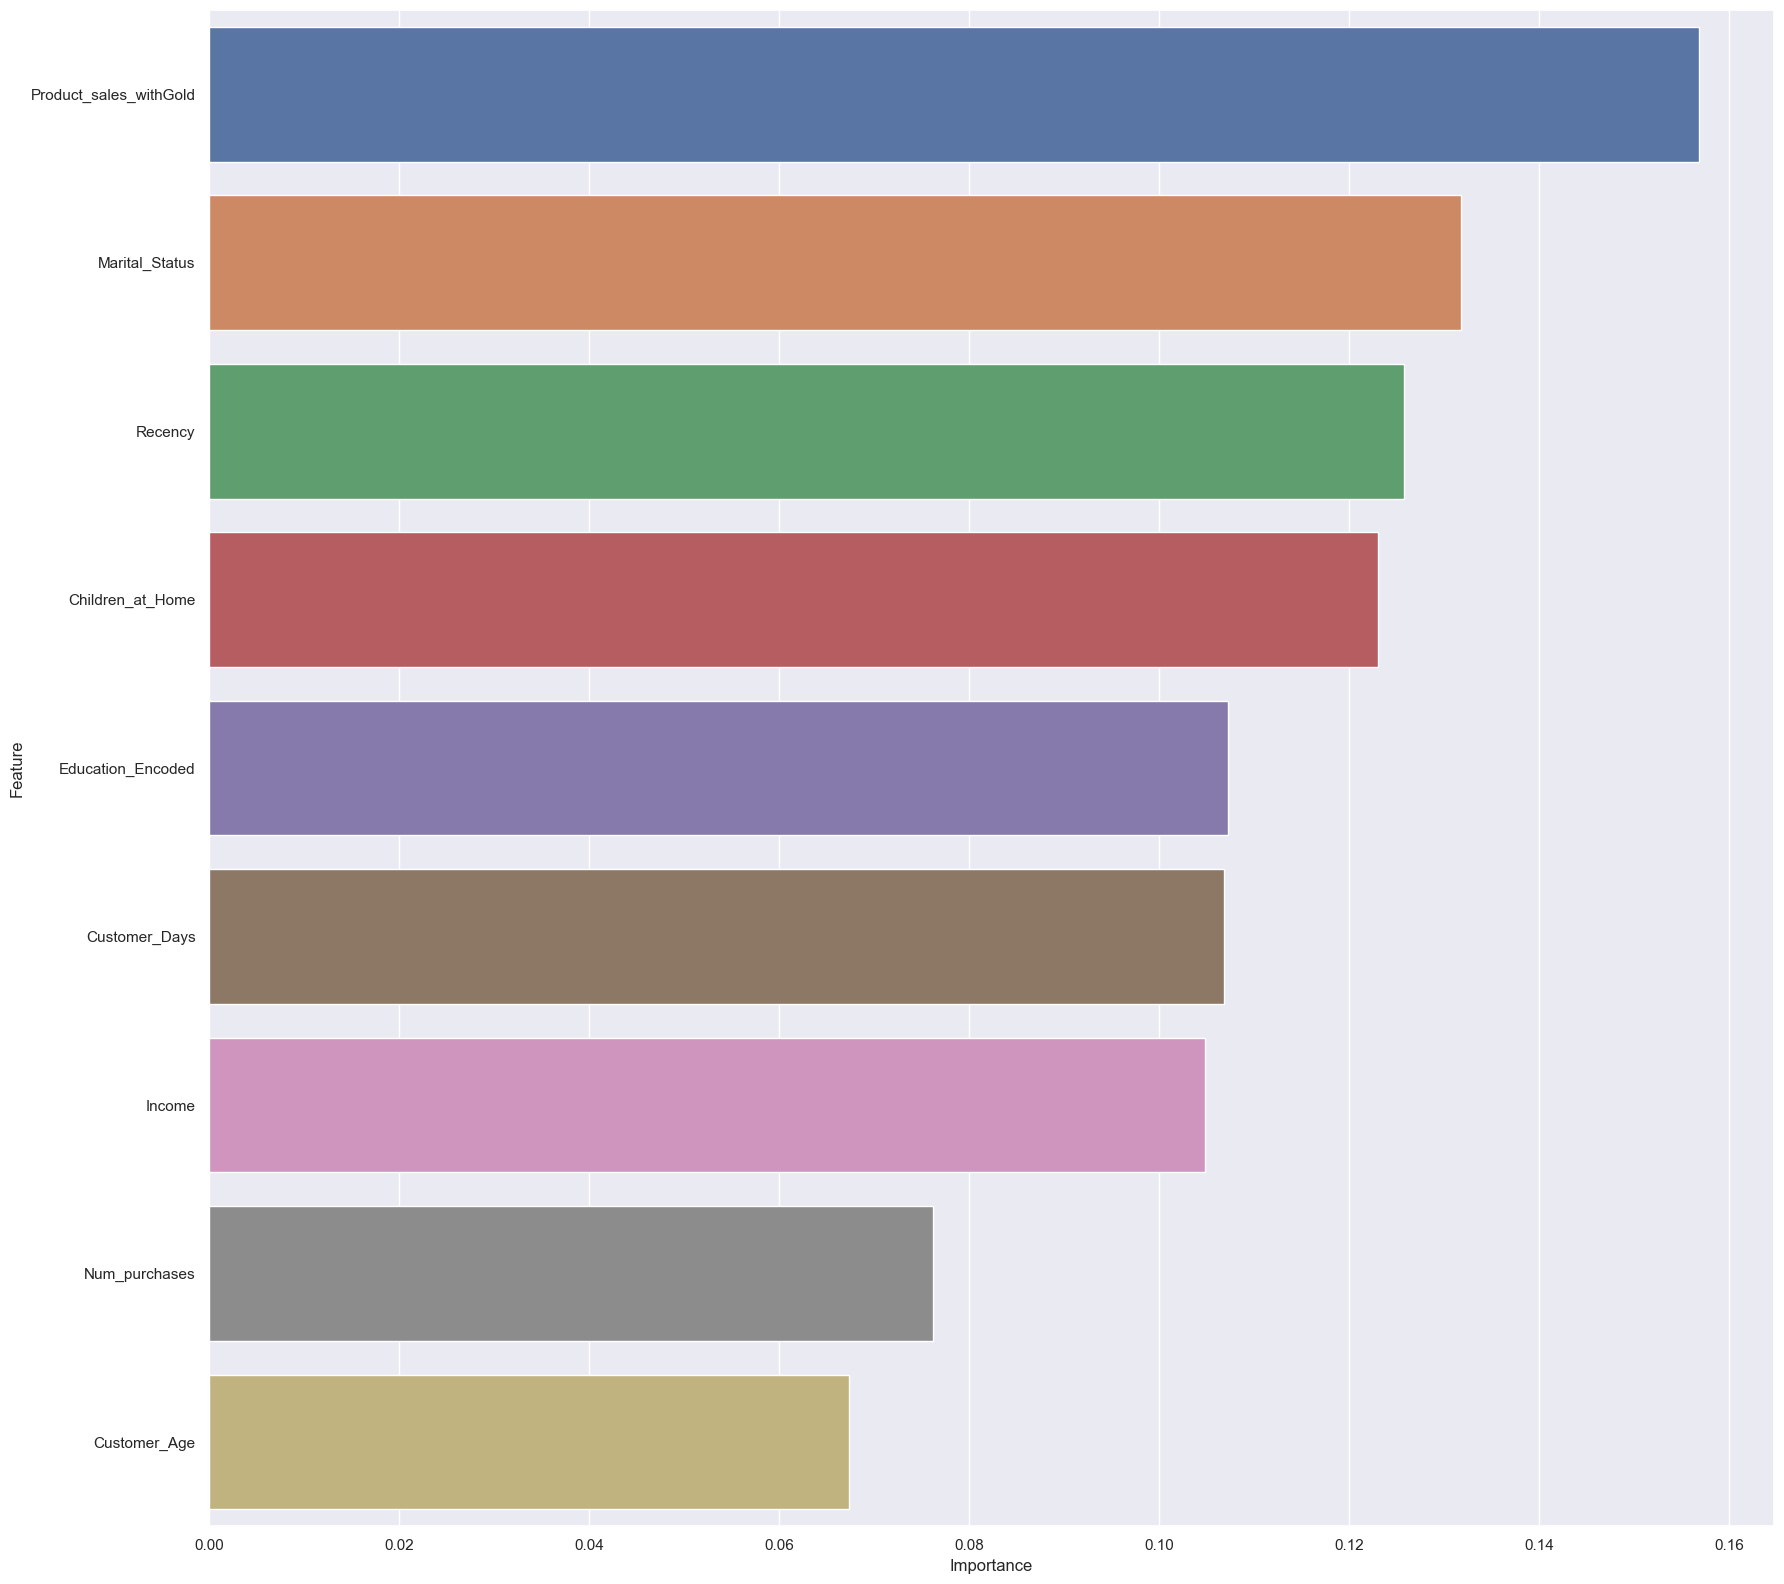

In [ ]:
imp = pd.DataFrame({'Importance':xgb.feature_importances_,'Feature':X.columns})
plt.figure(figsize=(18, 16))
sns.set(font_scale = 1)
sns.barplot(x="Importance", y="Feature", data=imp.sort_values(by="Importance", ascending=False))
plt.tight_layout()
plt.show()

This plot provides a visual representation of the relative importance of each feature according to the XGBoost classifier. Features with higher importance values are considered more influential in the model's predictions.

- "Product_sales_withioutGold" has the highest importance with a value of 0.17.
- "Marital_Status", "Recency", "NumWebVisitsMonth", and "Education_Encoded" each have an importance value of 0.13, indicating they are also relatively important features.
- "Customer Age" has the lowest importance with a value of 0.06, suggesting it may not contribute significantly to the predictive power of the model.

In [ ]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install --upgrade lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

sorted_models = models.sort_values(by='Accuracy', ascending=False)

print(sorted_models)


100%|██████████| 29/29 [00:07<00:00,  3.81it/s]

[LightGBM] [Info] Number of positive: 259, number of negative: 1521
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 1780, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.145506 -> initscore=-1.770295
[LightGBM] [Info] Start training from score -1.770295
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.86               0.59     0.59      0.82   
SVC                                0.86               0.57     0.57      0.81   
CalibratedClassifierCV             0.85               0.59     0.59      0.82   
RidgeClassifierCV                  0.85  

A comparative analysis of best classifiers based on their performance metrics(Chosen from LazyClassifier). It helps in selecting the best classifier for the given dataset and problem.

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [
    LogisticRegression(class_weight={0: 1, 1: 2}, random_state=1234),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(class_weight={0: 1, 1: 2}, probability=True, random_state=1234),
    DecisionTreeClassifier(class_weight={0: 1, 1: 2}, random_state=1234),
    RandomForestClassifier(class_weight={0: 1, 1: 2}, random_state=1234),
    XGBClassifier(class_weight={0: 1, 1: 2}, random_state=1234),
    AdaBoostClassifier(random_state=1234)
]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and predict the probabilities on the Evaluation set. After predicting the probabilities, we’ll calculate the False positive rates, True positive rate, and AUC scores.
for cls in classifiers:
    model = cls.fit(X_train,y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

C:\Users\mhag0\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\841592672.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers':cls.__class__.__name__,
C:\Users\mhag0\AppData\Local\Temp\ipykernel_14296\841592672.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:
result_table.sort_values(by='auc', ascending=False)

,fpr,tpr,auc
classifiers,,,
RandomForestClassifier,"[0.0, 0.002688172043010753, 0.0026881720430107...","[0.0, 0.0, 0.0136986301369863, 0.0136986301369...",0.83
AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.005376344086021506, 0.005376...","[0.0, 0.0136986301369863, 0.0821917808219178, ...",0.82
XGBClassifier,"[0.0, 0.0, 0.002688172043010753, 0.00268817204...","[0.0, 0.0136986301369863, 0.0136986301369863, ...",0.82
LogisticRegression,"[0.0, 0.0, 0.0, 0.002688172043010753, 0.002688...","[0.0, 0.0136986301369863, 0.0547945205479452, ...",0.75
GaussianNB,"[0.0, 0.002688172043010753, 0.0026881720430107...","[0.0, 0.0, 0.0273972602739726, 0.0273972602739...",0.75
DecisionTreeClassifier,"[0.0, 0.12634408602150538, 0.13172043010752688...","[0.0, 0.4520547945205479, 0.4520547945205479, ...",0.66
SVC,"[0.0, 0.002688172043010753, 0.0053763440860215...","[0.0, 0.0, 0.0, 0.0136986301369863, 0.01369863...",0.66
KNeighborsClassifier,"[0.0, 0.010752688172043012, 0.0430107526881720...","[0.0, 0.0273972602739726, 0.1506849315068493, ...",0.59


Each term corresponds to a concept related to binary classification performance evaluation:

- FPR (False Positive Rate):
        FPR is the ratio of false positive predictions to the total number of actual negatives in a binary classification problem.
        Mathematically, it's calculated as: FPR=False PositivesFalse Positives+True NegativesFPR=False Positives+True NegativesFalse Positives​.
        FPR represents the proportion of negative instances that were incorrectly classified as positive.

- TPR (True Positive Rate):
        TPR, also known as sensitivity, recall, or hit rate, measures the ratio of true positive predictions to the total number of actual positives in a binary classification problem.
        Mathematically, it's calculated as: TPR=True PositivesTrue Positives+False NegativesTPR=True Positives+False NegativesTrue Positives​.
        TPR represents the proportion of positive instances that were correctly classified as positive.

- AUC (Area Under the ROC Curve):
        AUC measures the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.
        AUC provides a single scalar value that summarizes the classifier's performance across all possible threshold settings.
        AUC values range from 0 to 1, where a higher AUC indicates better classifier performance: a perfect classifier has an AUC of 1, while a random classifier has an AUC of 0.5.

## It seems RandomForest , AdaBoostClassifier and XGBClassifier  are the best models for this dataset.

In [ ]:
xgb_classifier = XGBClassifier(random_state=1234)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print('XGBoost Results on Test Data')
print("Accuracy:", "%.6f" % accuracy)
print("Precision:", "%.6f" % precision)
print("Recall:", "%.6f" % recall)
print("F1 Score:", "%.6f" % f1)

XGBoost Results on Test Data
Accuracy: 0.842697
Precision: 0.528302
Recall: 0.383562
F1 Score: 0.444444


In [ ]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8337078651685393


In [ ]:

print('RandomForestClassifier')

print("Accuracy:", "%.6f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % precision_score(y_test, y_pred))
print("Recall:", "%.6f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % f1_score(y_test, y_pred))


RandomForestClassifier
Accuracy: 0.833708
Precision: 0.483871
Recall: 0.205479
F1 Score: 0.288462


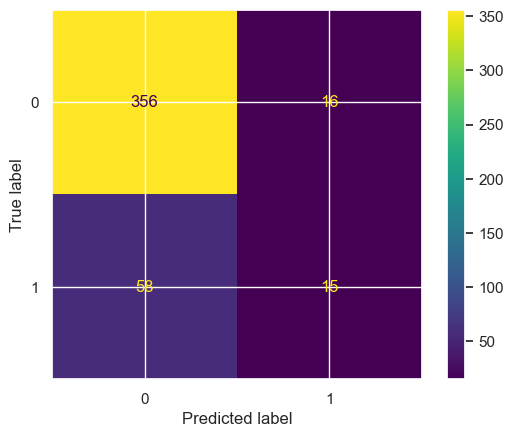

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)  # Assuming y_pred contains the predicted labels

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

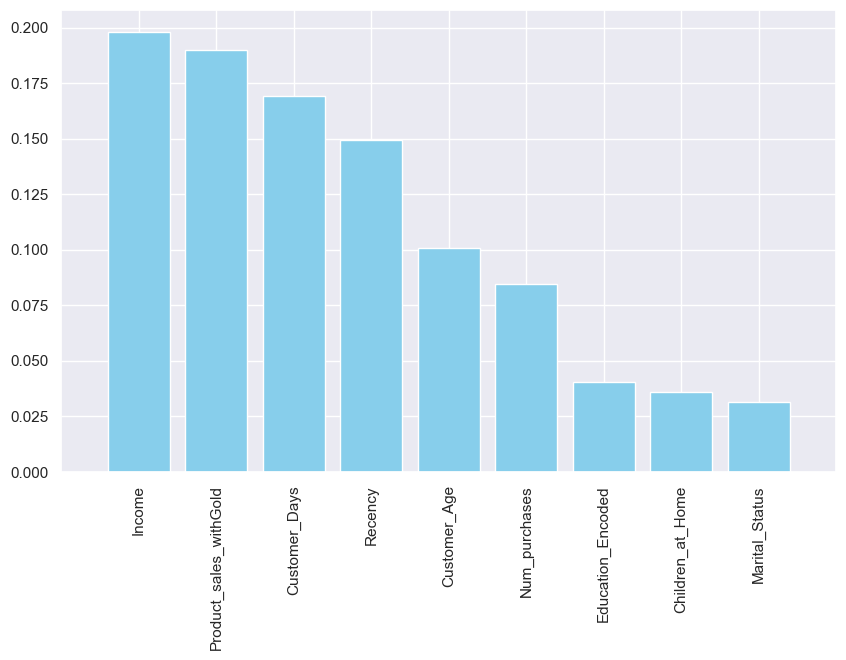

In [ ]:
importances = rf_classifier.feature_importances_

feature_names = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Initialize AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Train the AdaBoostClassifier on the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.849438202247191


C:\Users\mhag0\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('AdaBoost Results on Test Data')
print("Accuracy:", "%.6f" % accuracy)
print("Precision:", "%.6f" % precision)
print("Recall:", "%.6f" % recall)
print("F1 Score:", "%.6f" % f1)

AdaBoost Results on Test Data
Accuracy: 0.849438
Precision: 0.575000
Recall: 0.315068
F1 Score: 0.407080


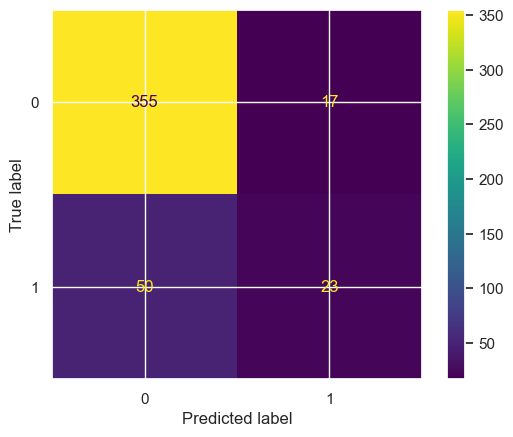

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

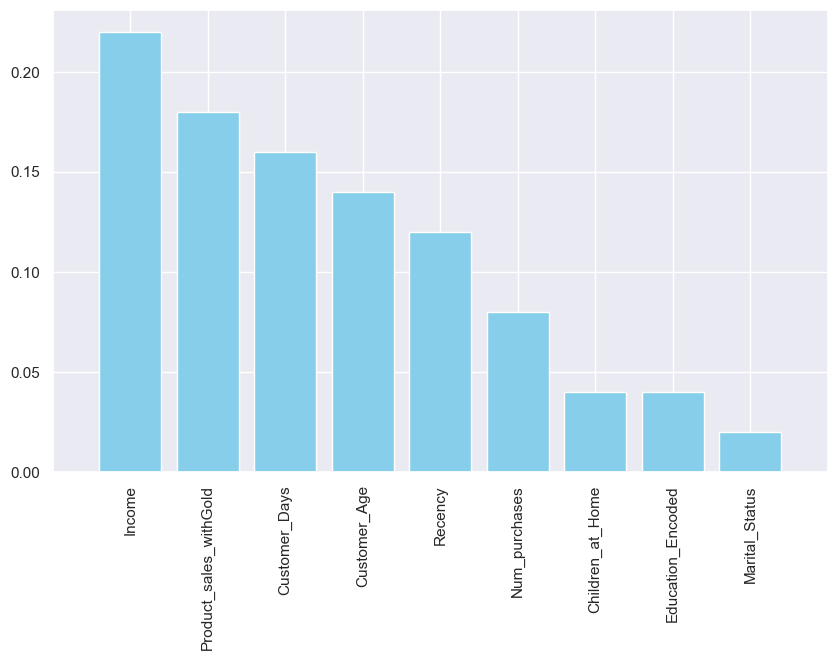

In [ ]:
importances = adaboost_clf.feature_importances_

feature_names = X.columns

indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


## Models comparison and selection

### RandomForestClassifier

- Accuracy: 0.833708
- Precision: 0.483871
- Recall: 0.205479
- F1 Score: 0.288462

## XGBoost Results on Test Data

- Accuracy: 0.842697
- Precision: 0.528302
- Recall: 0.383562
- F1 Score: 0.444444

###  AdaBoost Results on Test Data

- Accuracy: 0.849438
- Precision: 0.575000
- Recall: 0.315068
- F1 Score: 0.407080

XGBoost has performed best out of the 3 models on recall and F1 Score.

## Increasing Recall

In [ ]:
from xgboost import XGBClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb_classifier = XGBClassifier(random_state=1234, scale_pos_weight=ratio)

xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('XGBoost Results on Test Data')
print("Accuracy:", "%.6f" % accuracy)
print("Precision:", "%.6f" % precision)
print("Recall:", "%.6f" % recall)
print("F1 Score:", "%.6f" % f1)



XGBoost Results on Test Data
Accuracy: 0.820225
Precision: 0.446154
Recall: 0.397260
F1 Score: 0.420290


By changing Model Class Weight we get better Recall and F1score.

## Now we are going to answer Business questions and Hypotheses.


### Between Response and which features there is a statistical association at a 5% significant level?


 chi-square test between 'Response' and each categorical feature.
- Education_Encoded: p-value = 0.00011250511900561211 (Statistically significant)
- Marital_Status: p-value = 4.019522659109686e-12 (Statistically significant)
- Children_at_Home: p-value = 6.636101814891077e-21 (Statistically significant)
- Complain: p-value = 1.0 (Not statistically significant)

 t-test  between 'Response' and each continuous feature.

- Product_sales_withGold: p-value = 3.181206465302729e-24 (Statistically significant)
- Product_sales_withioutGold: p-value = 1.2588005298013356e-23 (Statistically significant)
- Income: p-value = 6.094446902825249e-13 (Statistically significant)
- Recency: p-value = 1.3410435650114339e-20 (Statistically significant)
- NumDealsPurchases: p-value = 0.8971988116962785 (Not statistically significant)
- NumWebVisitsMonth: p-value = 0.7728847809095503 (Not statistically significant)
- Customer_Age: p-value = 0.4638120869922264 (Not statistically significant)
- Num_purchases: p-value = 5.7404032540181145e-15 (Statistically significant)

### Which features are more important?

By Using Adaboost Classifier First 5 important features are :
- Income
- Product_sales_withGold
- Product_sales_withioutGold
- Recency
- Customer_Days(Tenure)
    

### Which machine learning algorithm has more ability to distinguish between positive and negative classes?

Between Performed Models XGBoost classifiers had more ability to distinguish between positive and negative classes

###  What is the Accuracy, Recall, Precision, and F1 score of the existing model?

XGaBoost Results on Test Data with Class Weighting
- Accuracy: 0.820225
- Precision: 0.446154
- Recall: 0.397260
- F1 Score: 0.420290